In [1]:
pwd()
using DataFrames
using LinearAlgebra
using Statistics
using KernelDensity
using GLM
using TypedTables
using HypothesisTests
using Plots
using StatsPlots
using StatsBase
using Unitful

In [2]:
""" Sieve of Eratosthenes function docstring """
function es(n::Int)
    isprime = trues(n)          # nth element vector of true-s
    isprime[1] = false          # 1 isnt prime
    for i in 2:isqrt(n)         # loop integers less or equal than sqrt(n)
        if isprime[i]           # conditional evaluation
            for j in i^2:i:n    # sequence with step i
                isprime[j] = false
            end
        end
    end
    return filter(x -> isprime[x], 1:n)  # filter using an anonymous function
end

println(es(100))
@time length(es(10^6))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
  0.003615 seconds (8 allocations: 8.348 MiB)


78498

In [3]:
NamedTuple()
(a=1,)


(a = 1,)

In [4]:
(x="a", y=1)

(x = "a", y = 1)

In [5]:
x = (p=1, q=2, r=3)
x.p

1

In [6]:
typeof(x)

    ╭─────────────────────────────────────────────────────────────────────────╮
    │                                                                         │
    │            @NamedTuple{p::Int64, q::Int64, r::Int64} <: Any             │
    │              │p ::Int64                                                 │
    │              │q ::Int64                                                 │
    │              │r ::Int64                                                 │
    │                                                                         │
    ╰─────────────────────────────────────────────────────────────────────────╯
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Docstring ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
    ┌──────────────────────────────────────────────────────────────────┐        
    │  NamedTuple                                                      │        
    └──────────────────────────────────────────────────────────────────┘        
                                    

In [7]:
# k = (:a, :b, :c)
# v = (1, 2, 3)
# NamedTuple{{k}}(v)

In [8]:
Array{Char}(undef, 2, 3, 4)

(binary data)

In [9]:
# Array{Int64}(undef, 0, 0)

In [10]:
zeros(5)

╭───────────────────╮
│                   │
│     (1)   0.0     │
│     (2)   0.0     │
│     (3)   0.0     │
│     (4)   0.0     │
│     (5)   0.0     │
│                   │
│                   │
╰─────── 5 items ───╯


In [11]:
ones(5)

╭───────────────────╮
│                   │
│     (1)   1.0     │
│     (2)   1.0     │
│     (3)   1.0     │
│     (4)   1.0     │
│     (5)   1.0     │
│                   │
│                   │
╰─────── 5 items ───╯


In [12]:
ones(Int64, 2, 1)

╭──── M... ─────╮
│               │
│               │
│         (1)   │
│               │
│   (1)   1     │
│   (2)   1     │
│               │
│               │
╰────── 2... ───╯


In [13]:
trues(3), falses(3)

(Bool[1, 1, 1], Bool[0, 0, 0])

In [14]:
Matrix(I, 3, 3)

╭──── Matrix   ─────────────╮
│                                 │
│                                 │
│          (1)     (2)     (3)    │
│                                 │
│   (1)   true    false   false   │
│   (2)   false   true    false   │
│   (3)   false   false   true    │
│                                 │
│                                 │
╰────────────────────── 3 × 3  ───╯


In [15]:
x = range(0, stop=1, length=11) # iterator having 11 equally spaced elements
collect(x)

╭────────────────────╮
│                    │
│      (1)   0.0     │
│      (2)   0.1     │
│      (3)   0.2     │
│      (4)   0.3     │
│      (5)   0.4     │
│      (6)   0.5     │
│      (7)   0.6     │
│      (8)   0.7     │
│      (9)   0.8     │
│     (10)   0.9     │
│     (11)   1.0     │
│                    │
│                    │
╰─────── 11 items ───╯


In [16]:
1:10 # iterable from 1 to 10

1:10

In [17]:
# print(each  1:2:10)

In [18]:
A = [10 20; 30 40]

╭──── Matri... ───────╮
│                     │
│                     │
│         (1)   (2)   │
│                     │
│   (1)   10    20    │
│   (2)   30    40    │
│                     │
│                     │
╰────────── 2 × 2  ───╯


In [19]:
for i in eachindex(A)
    println("A[", i, "] == ", A[i])
end


A[1] == 10
A[2] == 30
A[3] == 20
A[4] == 40


In [20]:
a = [x * y for x in 1:2, y in 1, z in 1:3]

╭──── Matrix   ──────╮
│                           │
│                           │
│         (1)   (2)   (3)   │
│                           │
│   (1)   1     1     1     │
│   (2)   2     2     2     │
│                           │
│                           │
╰──────────────── 2 × 3  ───╯


In [21]:
a = [x * y for x in 1:2, y in 1:1, z in 1:3] # singleton dimension is not dropped

╭──── Array... ───────╮
│                     │
│ ╭─────────────────╮ │
│ │                 │ │
│ │          (1)    │ │
│ │                 │ │
│ │    (1)   1      │ │
│ │    (2)   2      │ │
│ │                 │ │
│ ╰──────── [... ───╯ │
│                     │
│                     │
│ ╭─────────────────╮ │
│ │                 │ │
│ │          (1)    │ │
│ │                 │ │
│ │    (1)   1      │ │
│ │    (2)   2      │ │
│ │                 │ │
│ ╰──────── [... ───╯ │
│                     │
│                     │
│ ╭─────────────────╮ │
│ │                 │ │
│ │          (1)    │ │
│ │                 │ │
│ │    (1)   1      │ │
│ │    (2)   2      │ │
│ │                 │ │
│ ╰──────── [... ───╯ │
│                     │
│                     │
│                     │
╰─────── 2 × 1 × 3 ───╯


In [22]:
ndims(a)

3

In [23]:
eltype(a)

    ╭─────────────────────────────────────────────────────────────────────────╮
    │                                                                         │
    │                             Int64 <: Signed                             │
    │                                                                         │
    │                                                                         │
    ╰─────────────────────────────────────────────────────────────────────────╯
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Docstring ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
    ┌──────────────────────────────────────────────────────────────────┐
    │  Int64 <: Signed                                                 │
    └──────────────────────────────────────────────────────────────────┘

64-bit signed integer type.

In [24]:
length(a)

6

In [25]:
size(a)

(2, 1, 3)

In [26]:
axes(a)

(Base.OneTo(2), Base.OneTo(1), Base.OneTo(3))

In [27]:
eachindex(a)

Base.OneTo(6)

In [28]:
CartesianIndices(a)

CartesianIndices((2, 1, 3))

In [29]:
LinearIndices(a)

╭──── Linea... ───────╮
│                     │
│ ╭─────────────────╮ │
│ │                 │ │
│ │          (1)    │ │
│ │                 │ │
│ │    (1)   1      │ │
│ │    (2)   2      │ │
│ │                 │ │
│ ╰──────── [... ───╯ │
│                     │
│                     │
│ ╭─────────────────╮ │
│ │                 │ │
│ │          (1)    │ │
│ │                 │ │
│ │    (1)   3      │ │
│ │    (2)   4      │ │
│ │                 │ │
│ ╰──────── [... ───╯ │
│                     │
│                     │
│ ╭─────────────────╮ │
│ │                 │ │
│ │          (1)    │ │
│ │                 │ │
│ │    (1)   5      │ │
│ │    (2)   6      │ │
│ │                 │ │
│ ╰──────── [... ───╯ │
│                     │
│                     │
│                     │
╰─────── 2 × 1 × 3 ───╯


In [30]:
vec(a)

╭─────────────────╮
│                 │
│     (1)   1     │
│     (2)   2     │
│     (3)   1     │
│     (4)   2     │
│     (5)   1     │
│     (6)   2     │
│                 │
│                 │
╰──────── 6... ───╯


In [31]:
dropdims(a, dims=2)

╭──── Matrix   ──────╮
│                           │
│                           │
│         (1)   (2)   (3)   │
│                           │
│   (1)   1     1     1     │
│   (2)   2     2     2     │
│                           │
│                           │
╰──────────────── 2 × 3  ───╯


In [32]:
sum(a, dims=3)

╭──── Array... ───────╮
│                     │
│ ╭─────────────────╮ │
│ │                 │ │
│ │          (1)    │ │
│ │                 │ │
│ │    (1)   3      │ │
│ │    (2)   6      │ │
│ │                 │ │
│ ╰──────── [... ───╯ │
│                     │
│                     │
│                     │
╰─────── 2 × 1 × 1 ───╯


In [33]:
# Note, whitespace isnt allowed!
# count(> (0), a)
count(>(0), a)

6

In [34]:
a = 0:0, 0.1:1
a[1]

0:0

In [35]:
a[begin]

0:0

In [36]:
a[end]

0.1:1.0:0.1

In [37]:
a[begin:2:end]

(0:0,)

In [38]:
lastindex(a)

2

In [39]:
function logarithm(x::Real; base::Real=2.7182818284590)
    return log(base, x)
end

   ╭──── Function: logarithm ─────────────────────────────────────────────╮
   │                                                                      │
   │ (1)  logarithm(x::Real; base)                                        │
   │ (2)                                                                  │
   │                                                                      │
   ╰──────────────────────────────────────────────────────── 2 methods ───╯
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Docstring ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   No documentation found.                                                     
                                                                               
   `logarithm` is a `Function`.                                                
                                                                               
       ┌─────────────────────────────────────────────────────────┐             
       │  # 1 method for generic function "logarithm" from       │  

In [40]:
logarithm(10)

2.3025850929940845

In [41]:
logarithm(10; base=2)

3.3219280948873626

Often the name of a function doesnt matter and the need to quickly make one isnt needed. What we need are **anonymous functions**. Theyre used a lot in Julia's data science workflow. For example, when using `DataFrames.jl` or `Makie.jl`, sometimes we need a temporary function to filter data or format plot labels. That's a good time to use anonymous functions. Theyre especially useful when we dont want to create a function, and a simple inplace statement would be enough.

The syntax is simple. We use the `->` operator to define an anonymouse function.
On the left of the `->` we define the parameter name, on the right of the `->` we define what operations we want to perform on the parameter we just defined on the left. Here is an example:

> Suppose that we want to undo the log transformation by using an exponentiation:


In [42]:
map(x -> 2.7182818284590^x, logarithm(2))

2.0

Here, we're using the `map` function to conveniently map the anonymouse function (first argument) to `logarithm(2)` (the second argument). As a result, we get back the same number, because logarithm and exponentiation are inverse operations (atleast in the base that we've chosen - 2.7182818284590)


In [43]:
# using Pkg
# Pkg.add("StatsBase")
# Pkg.add("Statistics")
# Pkg.add("LinearAlgebra")
# Pkg.add("HypothesisTests")
# Pkg.add("GLM")
# Pkg.add("TypedTables")
# Pkg.add("Tables")
# Pkg.add("PrettyTables")
# Pkg.add("BusinessDays")
# Pkg.add("BenchmarkTools")
# Pkg.add("ShiftedArrays")
# Pkg.add("FinancialToolbox")
# #Pkg.add("FinancialDerivatives")
# Pkg.add("FinancialMonteCarlo")
# Pkg.add("PlotlyJS")
# Pkg.add("KernelDensity")
# Pkg.add("StatsPlots")

In [44]:
mean(winsor([8, 3, 1, 5, 7], count=1))

5.0

For our purposes (from Julia for Data Analysis), we need to use the `@time` macro to compare the performance of our `winsorized_mean` function against the implementation provided by StatsBase.jl.

What do macros do? _Macros_ are used to generate your program's code. You can think of macros as functions that take a prased representation in Julia code and return its transformation (technically, macros operate at the level of _abstact syntax trees_).

Its important to understand that macros are executed after Julia Code is parsed, but before it's compiled. If you're familiar with Lisp, you'll notice similarities in the way Julia and Lisp support macros. Note that in Julia, macros are different from C macros that perform textual manipulation of the source code.
Macros are **always** prefixed with the `@` character.


In [45]:
@time 1 + 2

  0.000001 seconds


3

In [46]:
# @assert 1 == 2 "1 is not equal 2"

In [47]:
# @assert(1 == 2, "1 is not equal 2")

In [48]:
@macroexpand @assert(1 == 2, "1 does not equal 2")


╭────────────────────────────────────────────────────────────────╮
│   if 1 == 2                                                    │
│       nothing                                                  │
│   else                                                         │
│       Base.throw(Base.AssertionError("1 does not equal 2"))    │
│           end                                                  │
│  ────────────────────────────────────────────────────────────  │
│   head::Symbol                      if                         │
│   args::Vector Any[:(1 == 2), nothing, :(Base.throw(Base....   │
│                                                                │
╰─────────────────────────────────────────────────────── Expr ───╯


In [49]:
using BenchmarkTools
x = rand(10^6);


In [50]:
function winsorized_mean(x::AbstractVector, k::Integer)
    k >= 0 || throw(ArgumentError("k must be non-negative"))
    length(x) > 2 * k || throw(ArgumentError("k is too large"))
    y = sort!(collect(x))
    for i in 1:k
        y[i] = y[k+1]
        y[end-i+1] = y[end-k]
    end
    return sum(y) / length(y)
end

   ╭──── Function: winsorized_mean ───────────────────────────────────────╮
   │                                                                      │
   │ (1)  winsorized_mean(x::AbstractVector, k::Integer)                  │
   │ (2)                                                                  │
   │                                                                      │
   ╰──────────────────────────────────────────────────────── 2 methods ───╯
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Docstring ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   No documentation found.                                                     
                                                                               
   `winsorized_mean` is a `Function`.                                          
                                                                               
       ┌─────────────────────────────────────────────────────────┐             
       │  # 1 method for generic function "winsorized_mean"      │  

In [51]:
winsorized_mean([8, 3, 1, 5, 7], 1)

5.0

In [52]:
winsorized_mean(1:10, 2)

5.5

Next, make a copy of the data stored in the x vector before sorting it. To achieve this, we use the `collect` function, which takes any iterable collection and returns an object storing the same values that has a `Vector` type. We pass this vector to the `sort!` function to sort it in place.
Why would we use the `collect` function to allocate a new `Vector`? The reason is that, for example, ranges like `1:10` are read-only; therefore, later, we wouldnt be able to update $y$ with $y[i] = y[k + 1]$ and

$$
y[end - i + 1] = y[end - k]
$$

Additionally, in general, Julia can support non-1-based indexing in arrays (See `OffsetArrays.jl`). However, `Vector` uses 1-based indexing. In summary, using the `collect` function turns any collection or general `AbstractVector` into a standard `Vector` type defined in Julia that is mutable and uses 1-based indexing.


In the examples above, you see the package supplied function is about ~3x faster than the function we wrote.

In that example, we first generated 1 million random floats from the range
$ [0, 1] $ by using the `rand` function. The results of the benchmarks show that the library function is around 3-4 times faster than our code. The reason for this is relatively easy to guess. In our function, we sort the whole vector, while most of the time it isnt needed, as $ k $ is typically relatively small in comparison to the size of the vector. The library solution uses the `partialsort!` function to improve its efficiency.
An important aspect of using the `@benchmark` macro is that we use \$x instead of just $ x $. This is needed as to get the correct assessment of execution time of the expressions we check. As a rule, remember to prefix with "\$" all global variables you use in the expressions you want to benchmark (this applies to benchmarking and isnt a general rule when using macros).

The short explanation is as follows. Recall that since $ x $ is a global variable, code using it isnt type stable. When the `@benchmark` macros sees the \$x, it is instructed to turn the $x$ variable into a local one (and thus type stable) before running the benchmarks.


In [53]:
@btime mean(winsor($x; count=10^5))

  12.803 ms (6 allocations: 22.89 MiB)


0.49966256918355173

In [54]:

calories = [144, 151, 157, 170, 152, 145, 175, 149, 99, 113, 140, 102, 135, 149, 149, 68, 136, 144, 72, 97]

calories


╭────────────────────╮
│                    │
│      (1)   144     │
│      (2)   151     │
│      (3)   157     │
│      (4)   170     │
│      (5)   152     │
│      (6)   145     │
│      (7)   175     │
│      (8)   149     │
│      (9)   99      │
│     (10)   113     │
│     (11)   140     │
│     (12)   102     │
│     (13)   135     │
│     (14)   149     │
│     (15)   149     │
│     (16)   68      │
│     (17)   136     │
│     (18)   144     │
│     (19)   72      │
│     (20)   97      │
│                    │
│                    │
╰─────── 20 items ───╯


In [55]:
calories_sort = sort!(calories)

╭────────────────────╮
│                    │
│      (1)   68      │
│      (2)   72      │
│      (3)   97      │
│      (4)   99      │
│      (5)   102     │
│      (6)   113     │
│      (7)   135     │
│      (8)   136     │
│      (9)   140     │
│     (10)   144     │
│     (11)   144     │
│     (12)   145     │
│     (13)   149     │
│     (14)   149     │
│     (15)   149     │
│     (16)   151     │
│     (17)   152     │
│     (18)   157     │
│     (19)   170     │
│     (20)   175     │
│                    │
│                    │
╰─────── 20 items ───╯


In [56]:
index = collect(1:length(calories))

╭───────────────────╮
│                   │
│      (1)   1      │
│      (2)   2      │
│      (3)   3      │
│      (4)   4      │
│      (5)   5      │
│      (6)   6      │
│      (7)   7      │
│      (8)   8      │
│      (9)   9      │
│     (10)   10     │
│     (11)   11     │
│     (12)   12     │
│     (13)   13     │
│     (14)   14     │
│     (15)   15     │
│     (16)   16     │
│     (17)   17     │
│     (18)   18     │
│     (19)   19     │
│     (20)   20     │
│                   │
│                   │
╰────── 20 items ───╯


In [57]:
calories_table = [index calories_sort]

╭──── Matrix... ───────╮
│                      │
│                      │
│          (1)   (2)   │
│                      │
│   (1)    1     68    │
│   (2)    2     72    │
│   (3)    3     97    │
│   (4)    4     99    │
│   (5)    5     102   │
│   (6)    6     113   │
│   (7)    7     135   │
│   (8)    8     136   │
│   (9)    9     140   │
│   (10)   10    144   │
│   (11)   11    144   │
│   (12)   12    145   │
│   (13)   13    149   │
│   (14)   14    149   │
│   (15)   15    149   │
│   (16)   16    151   │
│   (17)   17    152   │
│   (18)   18    157   │
│   (19)   19    170   │
│   (20)   20    175   │
│                      │
│                      │
╰────────── 20 × 2  ───╯


In [58]:
describe(calories)

Summary Stats:
Length:         20
Missing Count:  0
Mean:           132.350000
Minimum:        68.000000
1st Quartile:   110.250000
Median:         144.000000
3rd Quartile:   149.500000
Maximum:        175.000000
Type:           Int64


In [59]:
length(calories)

20

In [60]:
mean(calories)

132.35

In [61]:
minimum(calories)

68

In [62]:
median(calories)

144.0

In [63]:
quantile(calories)

╭──────────────────────╮
│                      │
│     (1)   68.0       │
│     (2)   110.25     │
│     (3)   144.0      │
│     (4)   149.5      │
│     (5)   175.0      │
│                      │
│                      │
╰────────── 5 items ───╯


In [64]:
mode(calories)

149

In [65]:
r = maximum(calories) - minimum(calories)

107

In [66]:
sample_var = var(calories)

913.7131578947368

In [67]:
population_var = var(calories, corrected=false)

868.0274999999999

In [68]:
std(calories)

30.22768859662837

In [69]:
std(calories; corrected=false)

29.46230642702638

In [70]:
sqrt(sample_var)

30.22768859662837

In [71]:
sqrt(population_var)

29.46230642702638

In [72]:
beverage_mean = 5.67
beverage_std = 2.09
beverage_n = 200

beverage_sem = beverage_std / sqrt(beverage_n)

0.1477853172679884

In [73]:
println("95% CI = ", beverage_mean, " \\plusmin ", 1.96 * beverage_sem)

95% CI = 5.67 \plusmin 0.2896592218452573


In [74]:
sem(calories)

6.759116650475626

In [75]:
std(calories) / sqrt(length(calories))

6.759116650475625

In [76]:
function ci(data)
    interval = 1.96 * sem(data)
    lower = mean(data) - interval
    upper = mean(data) + interval
    println("95% CI = ", mean(data), interval)
    return (lower, upper)
end

ci(calories)

95% CI = 132.3513.247868634932226


(119.10213136506776, 145.5978686349322)

In [77]:
function se_binom(p, n)
    seb = sqrt(p * (1 - p) / n)
end


   ╭──── Function: se_binom ──────────────────────────────────────────────╮
   │                                                                      │
   │ (1)  se_binom(p, n)                                                  │
   │ (2)                                                                  │
   │                                                                      │
   ╰──────────────────────────────────────────────────────── 2 methods ───╯
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Docstring ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   No documentation found.                                                     
                                                                               
   `se_binom` is a `Function`.                                                 
                                                                               
       ┌─────────────────────────────────────────────────────────┐             
       │  # 1 method for generic function "se_binom" from        │  

In [78]:
p = 0.72
n = 200
se_binom(p, n)

0.03174901573277509

In [79]:
function ci_binom(p, n)
    interval = 1.96 * se_binom(p, n)
    lower = p - interval
    upper = p + interval
    println("95% CI = ", p, " +/- ", interval)
    return (lower, upper)
end

ci_binom(p, n)

95% CI = 0.72 +/- 0.06222807083623917


(0.6577719291637608, 0.7822280708362391)

In [80]:
difference = [-4, -7, -3, -4, -6, -1, 1, 8, -8, 1]
OneSampleTTest(difference)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          -2.3
    95% confidence interval: (-5.707, 1.107)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.1610

Details:
    number of observations:   10
    t-statistic:              -1.5273113823954525
    degrees of freedom:       9
    empirical standard error: 1.5059142664102023


In [81]:
# O, Observations
O = [175, 25, 100, 100]

# E, Expectations
E = [137.5, 62.5, 137.5, 62.5]
ChisqTest(O, normalize(E, 1))


Pearson's Chi-square Test
-------------------------
Population details:
    parameter of interest:   Multinomial Probabilities
    value under h_0:         [0.34375, 0.15625, 0.34375, 0.15625]
    point estimate:          [0.4375, 0.0625, 0.25, 0.25]
    95% confidence interval: [(0.3875, 0.492), (0.0125, 0.117), (0.2, 0.3045), (0.2, 0.3045)]

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           <1e-13

Details:
    Sample size:        400
    statistic:          65.45454545454547
    degrees of freedom: 3
    residuals:          [3.19801, -4.74342, -3.19801, 4.74342]
    std. residuals:     [3.94771, -5.16398, -3.94771, 5.16398]


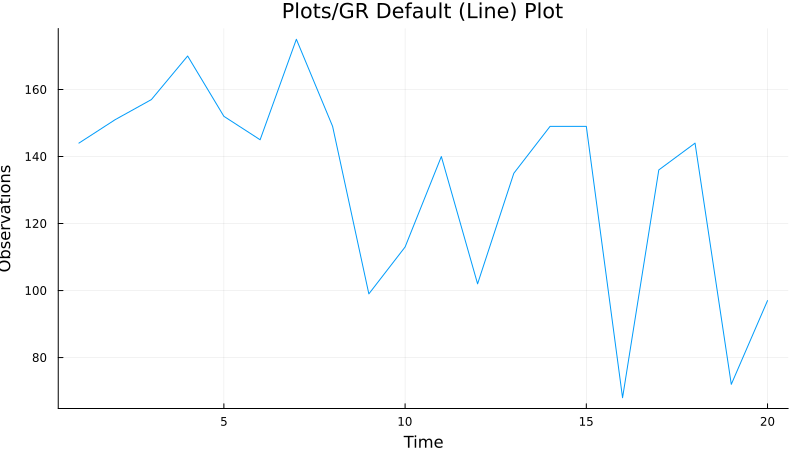

In [82]:
## Part two
gr(size=(800, 450))

t = collect(1:20)

observations = [144, 151, 157, 170, 152, 145, 175, 149, 99, 113, 140, 102, 135, 149, 149, 68, 136, 144, 72, 97]

p_line = plot(t, observations, xlabel="Time", ylabel="Observations", title="Plots/GR Default (Line) Plot", legend=false)

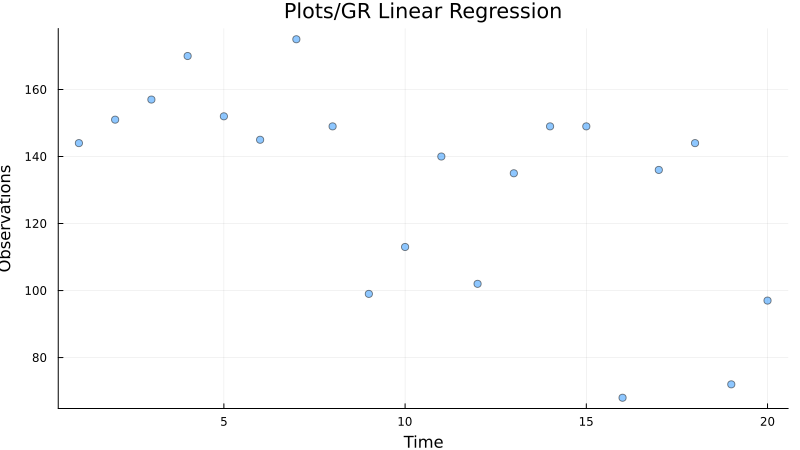

In [83]:
p_scatter = scatter(t, observations, xlabel="Time", ylabel="Observations", title="Plots/GR Linear Regression", legend=false, color=:dodgerblue, alpha=0.5)

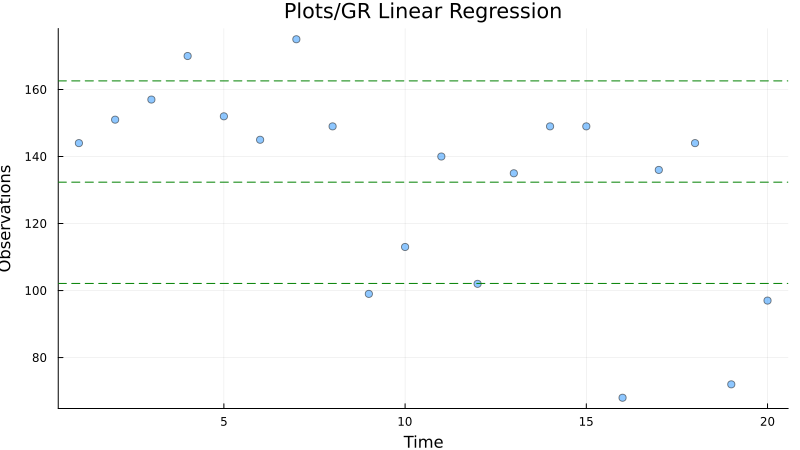

In [84]:
avg = mean(observations)
stdev = std(observations)

hline!([avg - stdev, avg, avg + stdev], linestyle=:dash, color=:green)

In [85]:

data = Table(X=t, Y=observations)   # typedtables
typeof(data)


    ╭─────────────────────────────────────────────────────────────────────────╮
    │                                                                         │
    │ Table{@NamedTuple{X::Int64, Y::Int64}, 1, @NamedTuple{X::Vector, Y::Vector}  <: AbstractVector{@NamedTuple{X::Int64, Y::Int64}  │
    │                 │data ::@NamedTuple{X::Vector, Y::Vector}               │
    │                                                                         │
    │                                                                         │
    ╰─────────────────────────────────────────────────────────────────────────╯
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Docstring ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
    ┌──────────────────────────────────────────────────────────────────┐
    │  Table(name1 = array1, ...)                                      │
    └──────────────────────────────────────────────────────────────────┘

Create a column-storage-based `Table` with column names `name1`, etc, from
arrays `

In [86]:
ols = lm(@formula(Y ~ X), data)  # GLM

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
──────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)  Lower 95%   Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  163.7473684210526      11.697877364218638   14.00    <1e-10  139.17104004252894    188.32369679957628
X             -2.9902255639097715     0.9765199350102718  -3.06    0.0067   -5.041817818107598   -0.9386333097119453
──────────────────────────────────────────────────────────────────────────

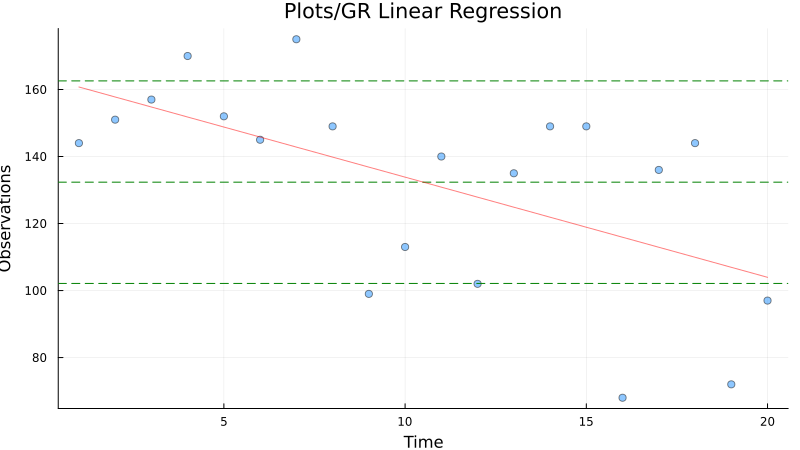

In [87]:
plot!(t, predict(ols), color=:red, alpha=0.5)


In [88]:
R2 = r2(ols)  # r^\2<TAB> but it DOESNT WORK

0.34250432928879493

In [89]:
predict(ols)

╭───────────────────────────────────╮
│                                   │
│      (1)   160.75714285714284     │
│      (2)   157.76691729323306     │
│      (3)   154.7766917293233      │
│      (4)   151.78646616541351     │
│      (5)   148.79624060150377     │
│      (6)   145.806015037594       │
│      (7)   142.81578947368422     │
│      (8)   139.82556390977444     │
│      (9)   136.83533834586467     │
│     (10)   133.8451127819549      │
│     (11)   130.85488721804512     │
│     (12)   127.86466165413535     │
│     (13)   124.87443609022559     │
│     (14)   121.88421052631581     │
│     (15)   118.89398496240605     │
│     (16)   115.90375939849628     │
│     (17)   112.9135338345865      │
│     (18)   109.92330827067673     │
│     (19)   106.93308270676695     │
│     (20)   103.94285714285718     │
│                                   │
│                                   │
╰────────────────────── 20 items ───╯


In [90]:
newX = Table(X=[5.5, 10.7, 12.3])
predict(ols, newX)

╭──────────────────────────────────╮
│                                  │
│     (1)   147.30112781954887     │
│     (2)   131.75195488721806     │
│     (3)   126.96759398496242     │
│                                  │
│                                  │
╰────────────────────── 3 items ───╯


In [91]:
past_future_X = Table(X=[-100, 100])
predict(ols, past_future_X)

╭───────────────────────────────────╮
│                                   │
│     (1)   462.7699248120298       │
│     (2)   -135.27518796992456     │
│                                   │
│                                   │
╰─────────────────────── 2 items ───╯


In [92]:
savefig(p_scatter, "regression_gr.svg")

"c:\\Users\\eorlo\\Desktop\\mkt_notes_general\\_gen_notes\\juls\\regression_gr.svg"

In [93]:
K = Int(round(1 + 3.322 * log(length(observations))))  # Sturge's rule

11

In [94]:
h = fit(Histogram, observations, nbins=K)  # StatsBase

Histogram{Int64, 1, Tuple{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}}
edges:
  60.0:10.0:180.0
weights: [1, 1, 0, 2, 1, 1, 0, 2, 7, 3, 0, 2]
closed: left
isdensity: false

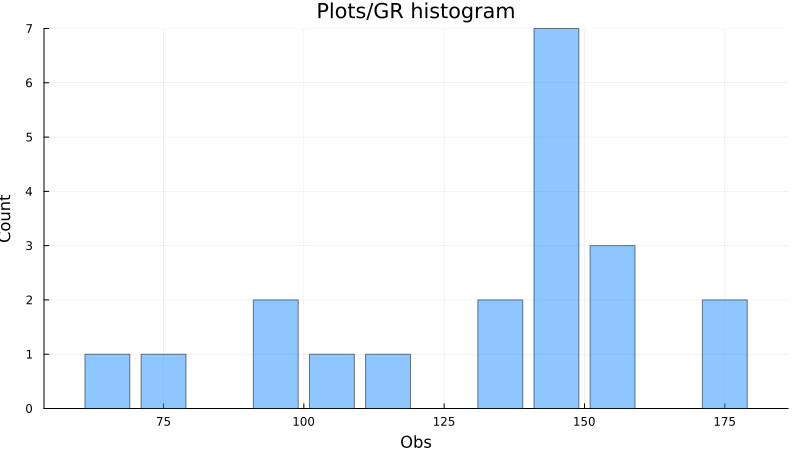

In [95]:
p_histogram = bar(h.edges, h.weights, xlabel="Obs", ylabel="Count", title="Plots/GR histogram", legend=false, color=:dodgerblue, alpha=0.5)

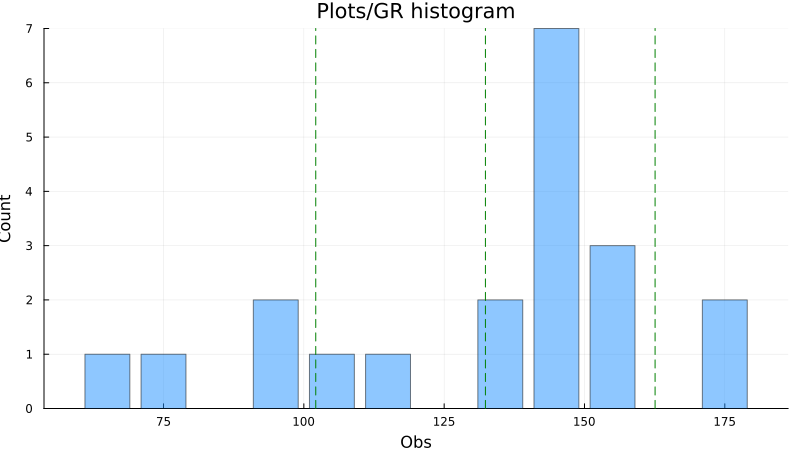

In [96]:
vline!([avg - stdev, avg, avg + stdev], linestyle=:dash, color=:green)

In [97]:
savefig(p_histogram, "histogram_gr.svg")

"c:\\Users\\eorlo\\Desktop\\mkt_notes_general\\_gen_notes\\juls\\histogram_gr.svg"

In [98]:

d = kde(observations)

UnivariateKDE{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}(10.07962508613641:0.10886211520651058:232.92037491386358, [1.165831200538106e-6, 1.1679238810834505e-6, 1.1710461806173876e-6, 1.1752001973690598e-6, 1.180388703002442e-6, 1.186615143661078e-6, 1.1938836412955789e-6, 1.202198995220536e-6, 1.2115666839615687e-6, 1.2219928673309205e-6  …  1.2015525092687416e-6, 1.1933164859419731e-6, 1.1861260903885899e-6, 1.1799766877475205e-6, 1.174864320246721e-6, 1.1707857056832312e-6, 1.1677382361382875e-6, 1.1657199769827837e-6, 1.164729666092417e-6, 1.1647667133773618e-6])

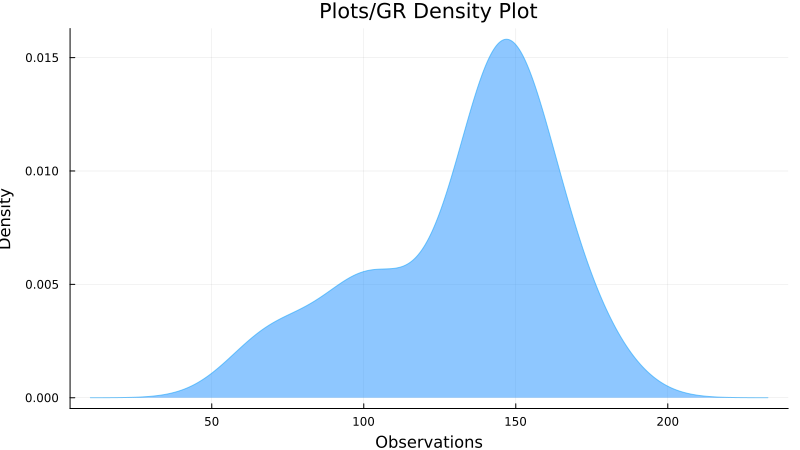

In [99]:
p_density = plot(d.x, d.density,
    xlabel="Observations",
    ylabel="Density",
    title="Plots/GR Density Plot",
    legend=false,
    fill=(0, :dodgerblue),
    alpha=0.5
)


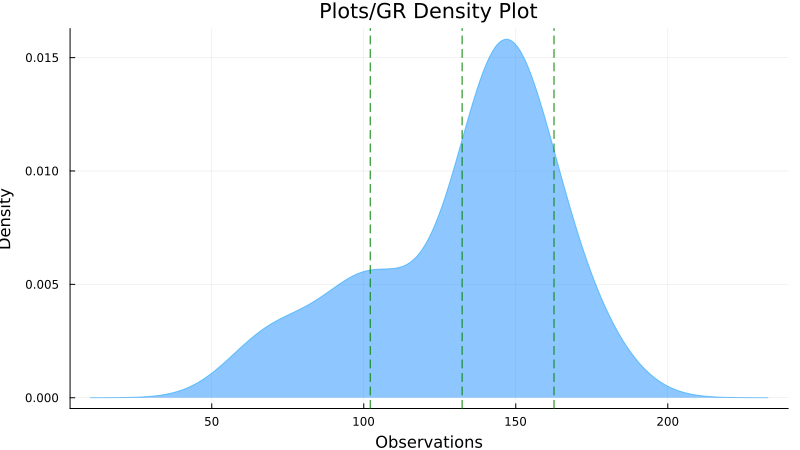

In [100]:
vline!([avg - stdev, avg, avg + stdev], linestyle=:dash, color=:green)

In [101]:
densty = d.density

╭──────────────────────────────────────╮
│                                      │
│      (1)   1.165831200538106e-6      │
│      (2)   1.1679238810834505e-6     │
│      (3)   1.1710461806173876e-6     │
│      (4)   1.1752001973690598e-6     │
│      (5)   1.180388703002442e-6      │
│      (6)   1.186615143661078e-6      │
│      (7)   1.1938836412955789e-6     │
│      (8)   1.202198995220536e-6      │
│      (9)   1.2115666839615687e-6     │
│     (10)   1.2219928673309205e-6     │
│     (11)   1.2334843887840813e-6     │
│     (12)   1.2460487780158007e-6     │
│     (13)   1.2596942538293208e-6     │
│     (14)   1.2744297272536745e-6     │
│     (15)   1.2902648049159873e-6     │
│     (16)   1.30720979268353e-6       │
│     (17)   1.3252756995473305e-6     │
│     (18)   1.3444742417785711e-6     │
│     (19)   1.364817847323077e-6      │
│     (20)   1.3863196604681563e-6     │
│     (21)   1.4089935467644435e-6     │
│     (22)   1.4328540981897384e-6     │
│     (23)   1.4

In [102]:
bandwidth = step(d.x)

0.10886211520651058

In [103]:
probability = densty .* bandwidth

sum(probability)

1.0000000000000093

In [104]:
savefig(p_density, "density_gr.svg")

"c:\\Users\\eorlo\\Desktop\\mkt_notes_general\\_gen_notes\\juls\\density_gr.svg"

In [105]:
# Pkg.add("PlotlyJS")
# using StatsPlots
println(StatsPlots.backends())

[:pyplot, :pythonplot, :unicodeplots, :plotly, :plotlyjs, :gr, :pgfplots, :pgfplotsx, :inspectdr, :hdf5, :gaston]


In [106]:
observations = [144, 151, 157, 170, 152, 145, 175, 149, 99, 113, 140, 102, 135, 149, 149, 68, 136, 144, 72, 97]

t = collect(1:20)

# select plotting packages

# using StatsPlots
# plotly(size=(800, 450))
# plotly()

╭───────────────────╮
│                   │
│      (1)   1      │
│      (2)   2      │
│      (3)   3      │
│      (4)   4      │
│      (5)   5      │
│      (6)   6      │
│      (7)   7      │
│      (8)   8      │
│      (9)   9      │
│     (10)   10     │
│     (11)   11     │
│     (12)   12     │
│     (13)   13     │
│     (14)   14     │
│     (15)   15     │
│     (16)   16     │
│     (17)   17     │
│     (18)   18     │
│     (19)   19     │
│     (20)   20     │
│                   │
│                   │
╰────── 20 items ───╯


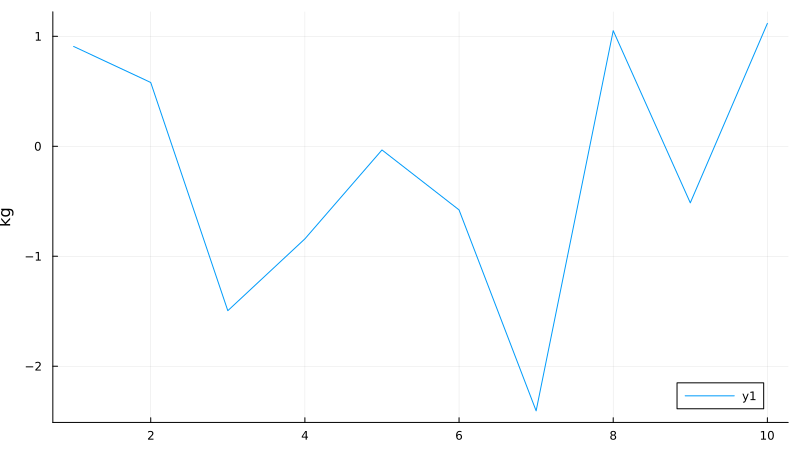

In [107]:
# using Unitful
Plots.gr()
y = randn(10) * u"kg"
plot(y)

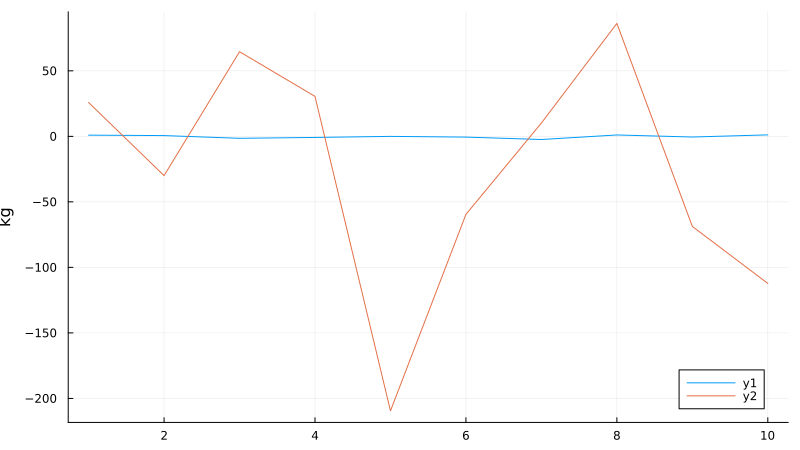

In [108]:
y2 = 100randn(10) * u"kg"
plot!(y2)

In [109]:
plot!(rand(10) * u"m")

Unitful.DimensionError: DimensionError: kg and m are not dimensionally compatible.

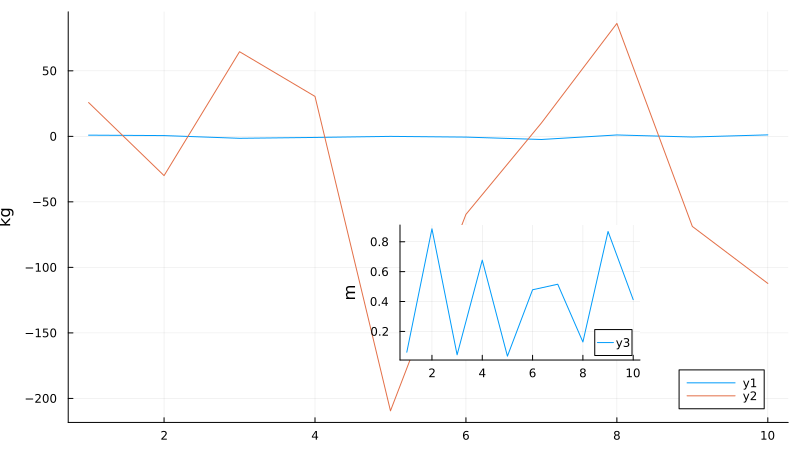

In [110]:
plot!(rand(10) * u"m", inset=bbox(0.5, 0.5, 0.3, 0.3), subplot=2)

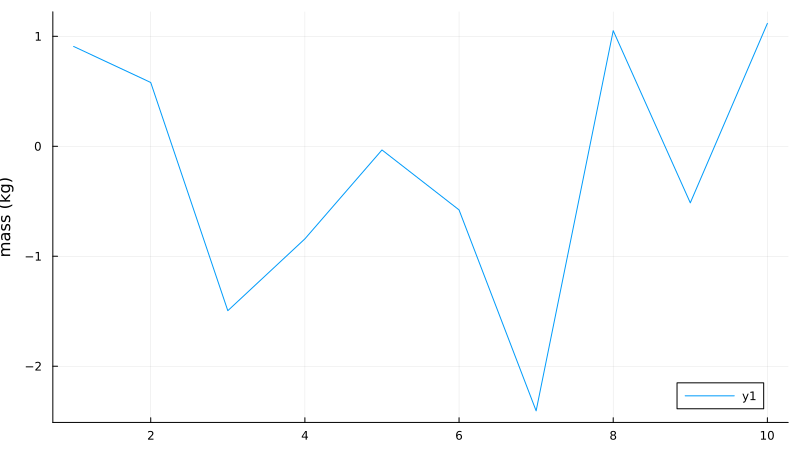

In [111]:
plot(y, ylabel="mass")

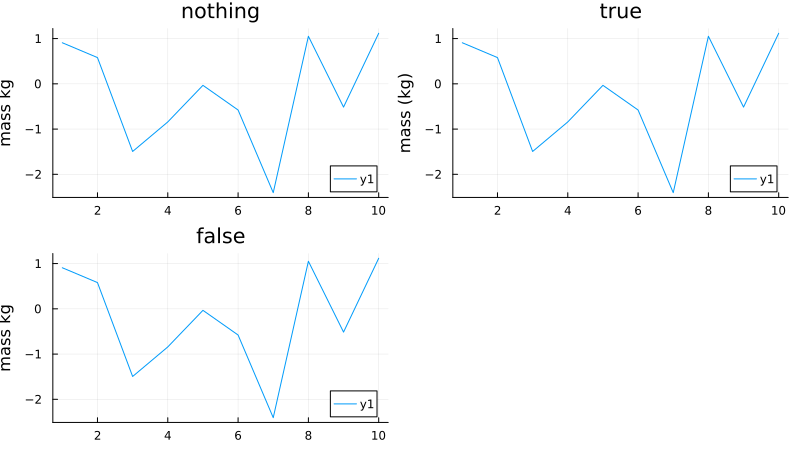

In [114]:
plot([plot(y, ylab="mass", title=repr(s), unitformat=s) for s in (nothing, true, false)]...)

In [115]:
URsymbols = if isdefined(Base, :get_extension)
    getproperty(Base.get_extension(Plots, :UnitfulExt), :UNIT_FORMATS)
else
    Plots.UnitfulExt.UNIT_FORMATS
end |> keys

KeySet for a Dict{Symbol, Any} with 11 entries. Keys:
  :slash
  :square
  :slashsquare
  :verbose
  :slashround
  :angle
  :slashcurly
  :slashangle
  :curly
  :none
  :round

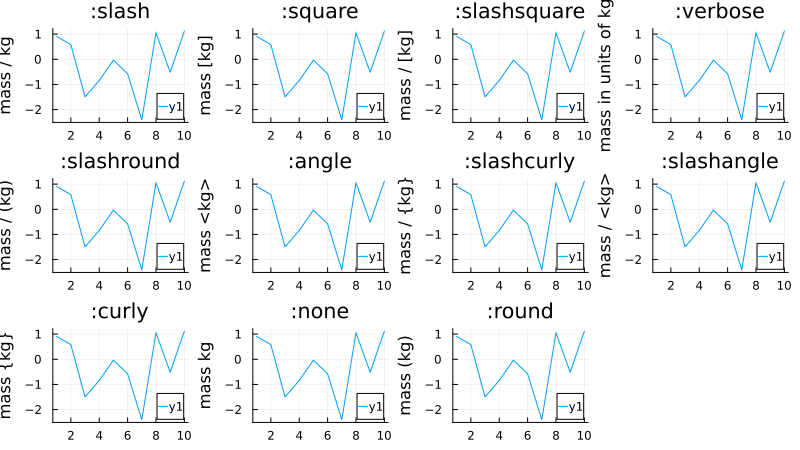

In [116]:
plot([plot(y, ylab="mass", title=repr(s), unitformat=s) for s in URsymbols]...)

`Unitformat` can also be a `Char`, a `String`, or a `Tuple`(of `Char`s or `String`s), which will be inserted around the label and unit depending on the length of the tuple.


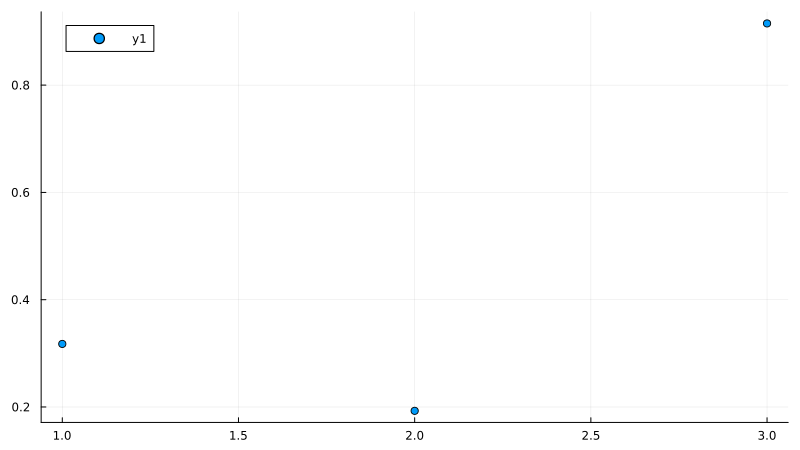

In [158]:
# pl = scatter(
#     1:3,
#     rand(3),
#     extra_kwargs=KW(
#         :series => KW(:customdata => ["a", "b", "c"]),
#         :plot => KW(:legend => KW(:itemsizing => "constant"))
#     )
# )

In [152]:
p_scatter = scatter(t, observations,
    xlabel="Time",
    ylabel="Observations",
    title="StatsPlots/PlotlyJS Linear Regression",
    legend=false,
    color=:dodgerblue,
    alpha=0.5,
    regression=true
)


Base.Meta.ParseError: ParseError:
# Error @ c:\Users\eorlo\Desktop\mkt_notes_general\_gen_notes\juls\julia_fin.ipynb:11:1

?p_scatter
╙ ── not a unary operator

In [142]:
avg = mean(observations)
stdev = std(observations)

30.227688596628376

In [143]:
# add mean and standard deviation to plot

hline!([avg - stdev, avg, avg + stdev],
    linestyle=:dash, color=:green
)

In [211]:

# save plot

# savefig(p_scatter, "regression_plotlyjs.svg")
savefig(p_scatter, "regression_plotlyjs")

"c:\\Users\\eorlo\\Desktop\\mkt_notes_general\\_gen_notes\\juls\\regression_plotlyjs.html"

In [117]:

# 5. how to create histogram using StatsPlots/PlotlyJS

# Sturge's Rule

K = Int(round(1 + 3.322 * log(length(observations))))

# generate histogram

p_histogram = histogram(observations,
    bins=K,
    xlabel="Observations",
    ylabel="Count",
    title="StatsPlots/PlotlyJS Histogram",
    legend=false,
    color=:dodgerblue,
    alpha=0.5
)

In [118]:

# add mean and standard deviations

vline!([avg - stdev, avg, avg + stdev],
    linestyle=:dash, color=:green
)

In [119]:

# save plot

# savefig(p_histogram, "histogram_plotlyjs.svg")

# savefig(p_histogram)

In [120]:

# 6. how to create density plot using StatsPlots/PlotlyJS

# generate plot

p_density = density(t, observations,
    xlabel="Observations",
    ylabel="Density",
    title="StatsPlots/PlotlyJS Density Plot",
    legend=false,
    fill=(0, :dodgerblue),
    alpha=0.5
)

In [121]:

# add mean and standard deviations

vline!([avg - stdev, avg, avg + stdev],
    linestyle=:dash, color=:green
)

In [122]:

# save plot

# savefig(p_density, "density_plotlyjs") # saves as html
# savefig(p_density, "density_plotlyjs.png") # doesnt work

In [123]:
# Pkg.add("CairoMakie")

In [124]:
################################################################################
# using CairoMakie
################################################################################

using CairoMakie
# copy and paste data

observations = [144, 151, 157, 170, 152, 145, 175, 149, 99, 113, 140, 102, 135, 149, 149, 68, 136, 144, 72, 97]

t = collect(1:20)

# select plotting package


# 7. how to create linear regression using CairoMakie

# select font(s)

font1 = "Comic Sans MS-Regular"
font2 = "Comic Sans MS-Bold"
font3 = "Comic Sans MS-Bold-Italic"
font4 = "Comic Sans MS-Italic"
font5 = "Times New Roman-Regular"


"Times New Roman-Regular"

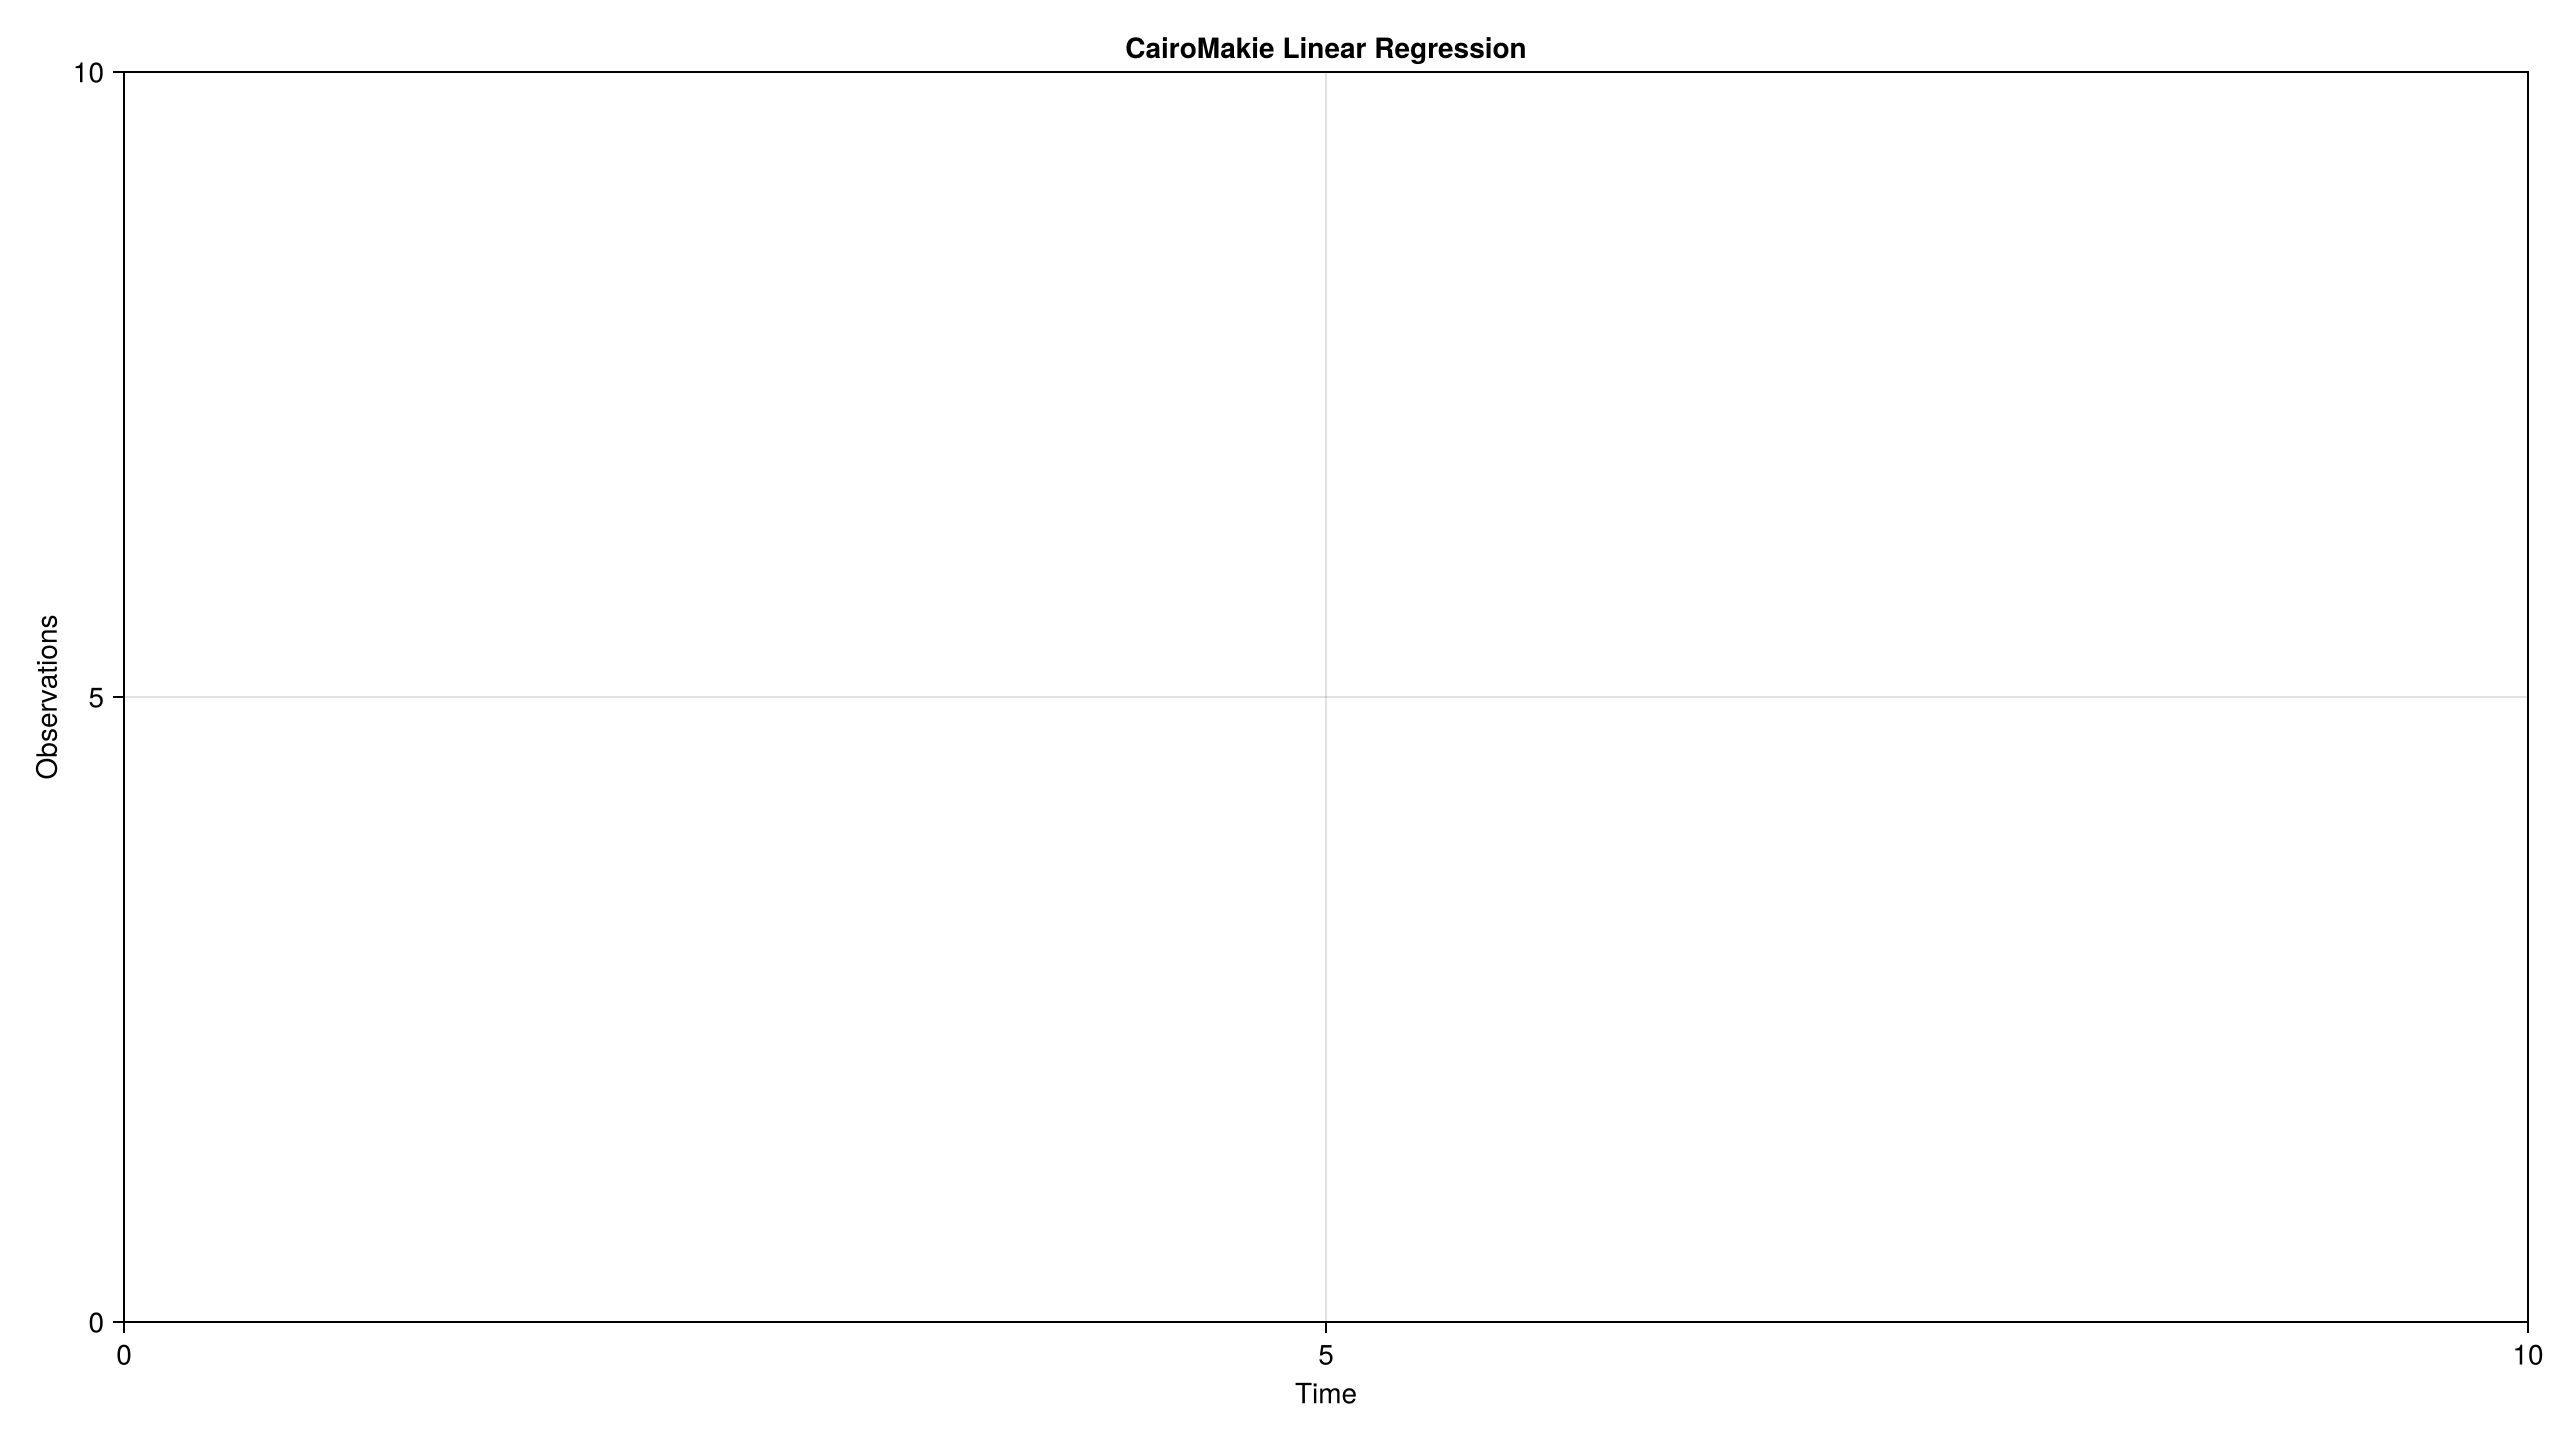

In [125]:

# initialize plot

# resolution kw for Scene's and Figures has been deprecated.
# Use Figure(; size = ...) or Scene(; size = ...) instead
# fig = Figure(; size=(1280, 720), font=font5)
fig = Figure(; size=(1280, 720), font=font5)

ax1 = fig[1, 1] = Axis(fig,
    title="CairoMakie Linear Regression",
    xlabel="Time",
    ylabel="Observations"
)
fig


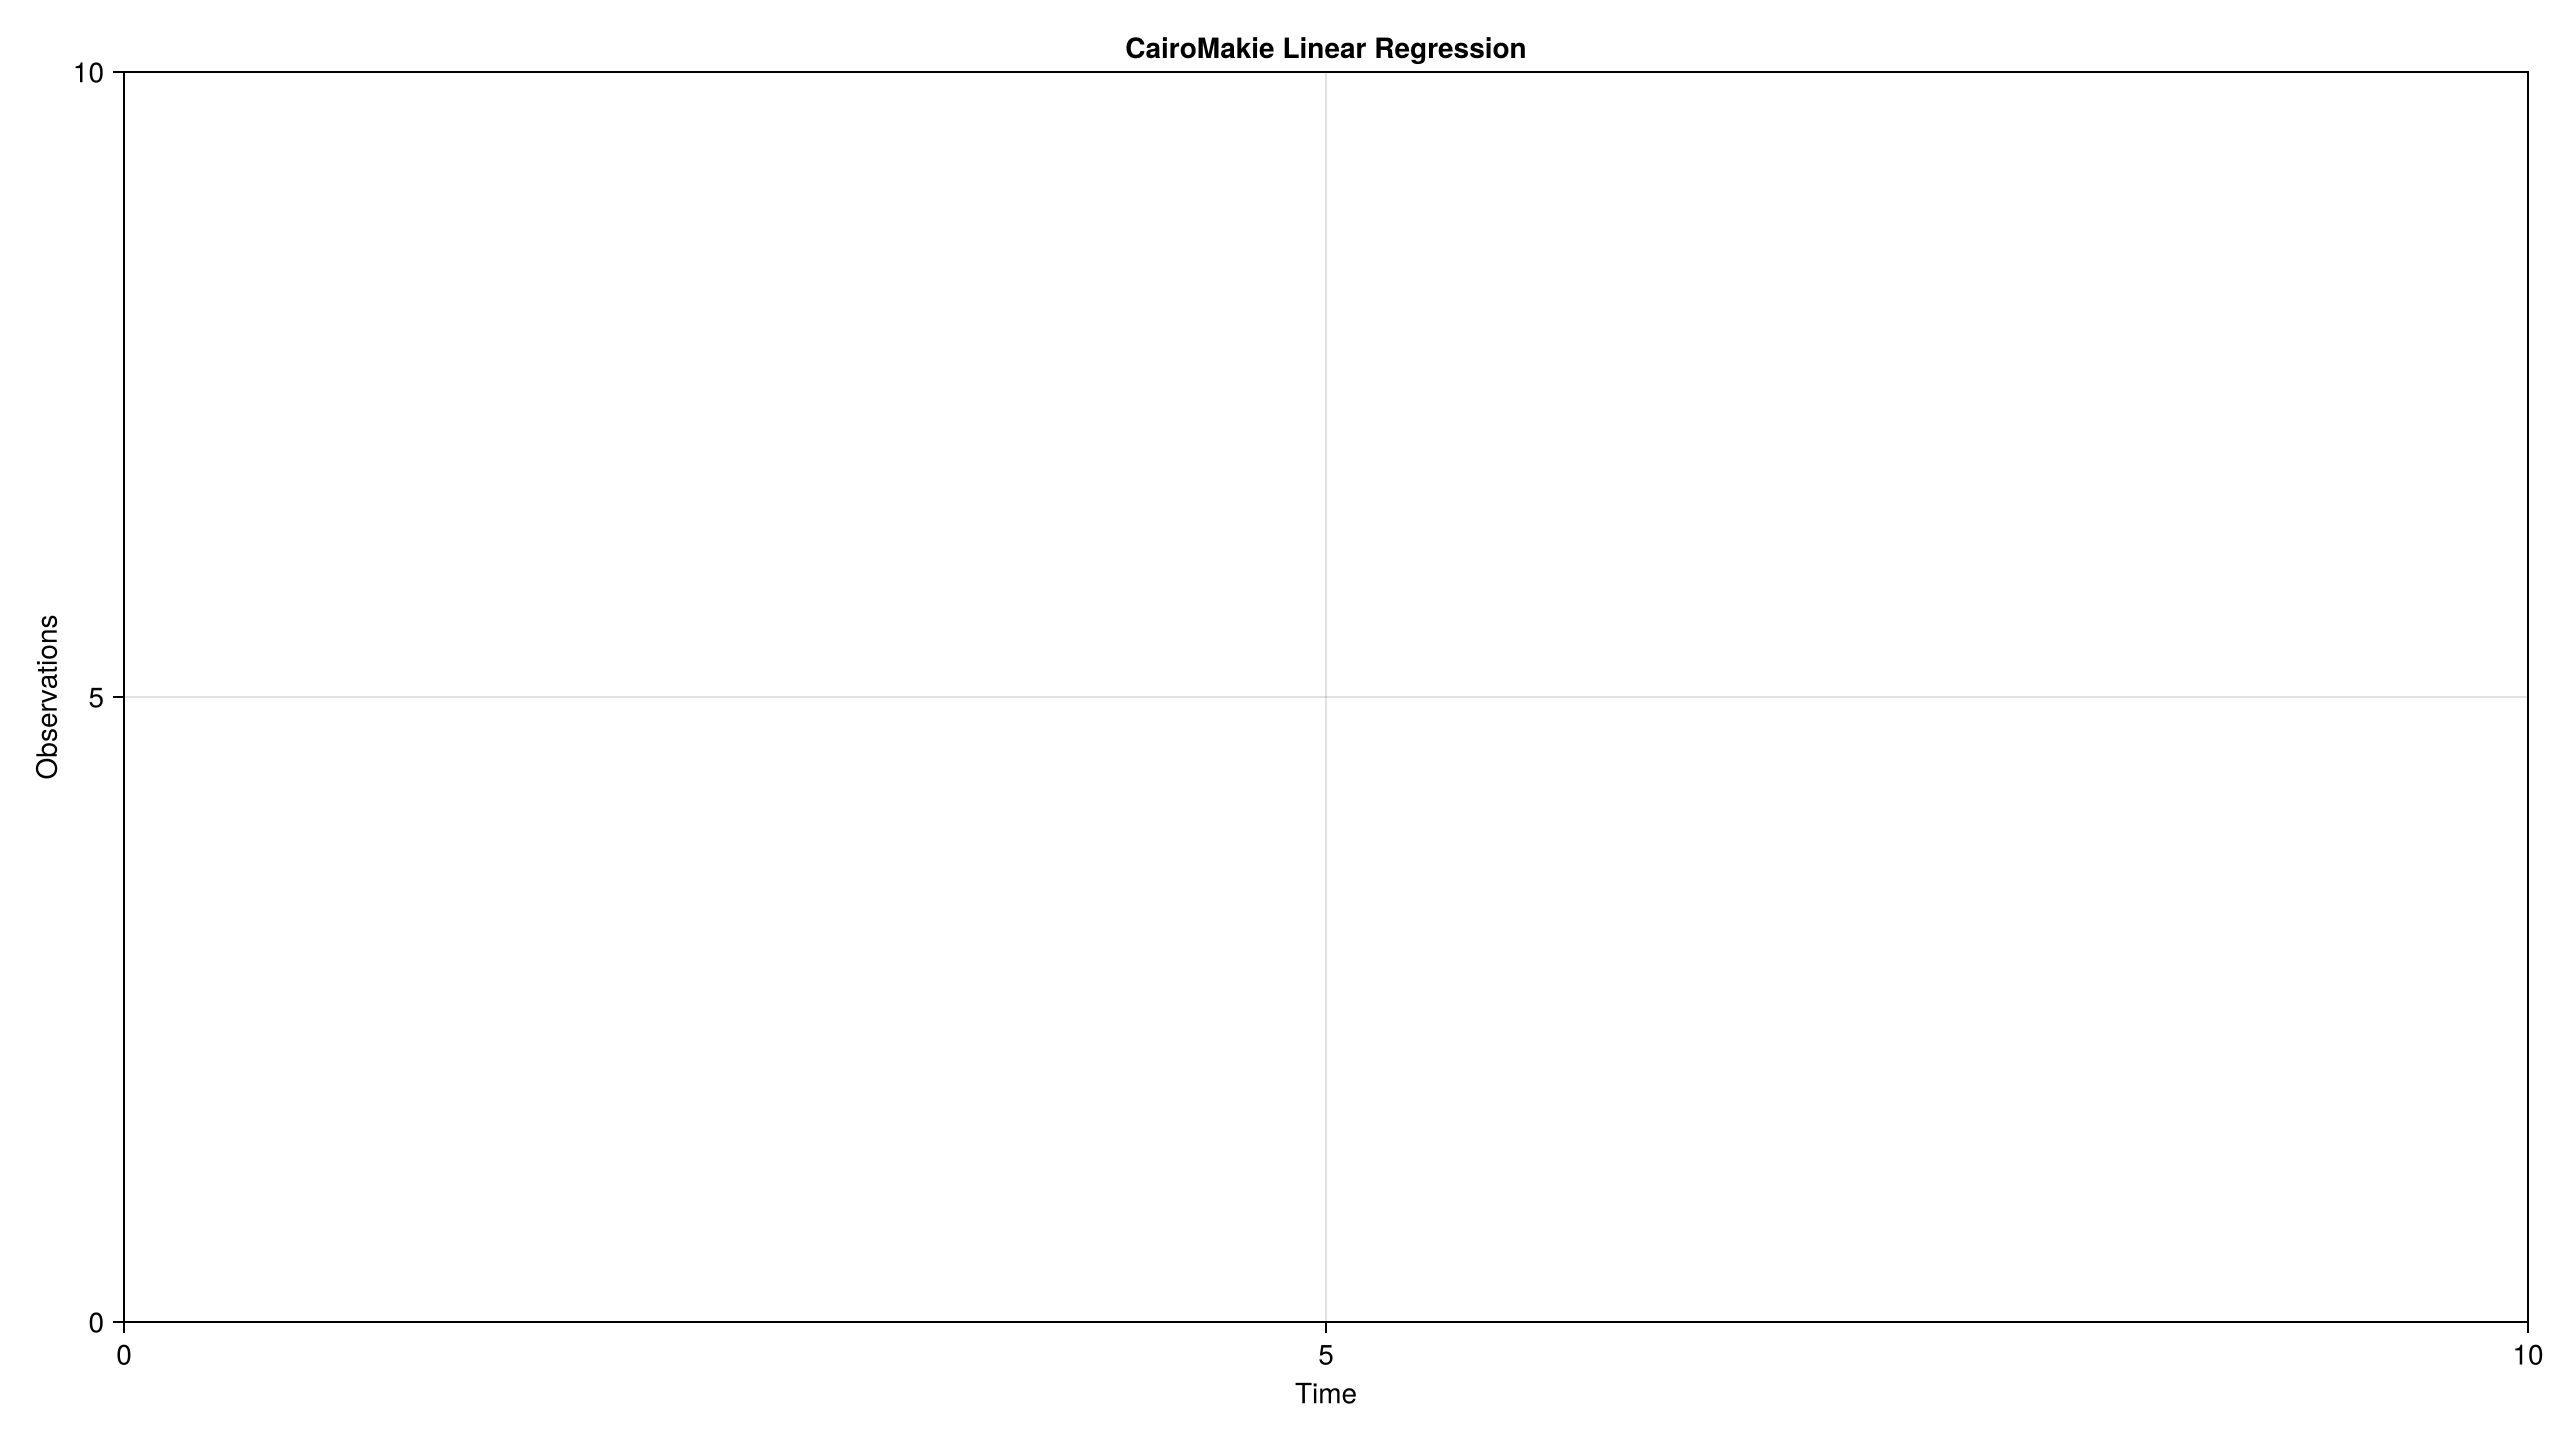

In [126]:
# resolution kw for Scene's and Figures has been deprecated.
# Use Figure(; size = ...) or Scene(; size = ...) instead
# fig = Figure(resolution=(1280, 720), font=font5)
# fig = Figure(; size=(1280, 720), font=font5)
# fig = Figure(; size=(1280, 720), font=font5)
fig = Figure(; size=(1280, 720), font=font5)

ax1 = fig[1, 1] = Axis(fig,
    title="CairoMakie Linear Regression",
    xlabel="Time",
    ylabel="Observations"
)
fig


In [127]:
# using Gtk, CairoMakie

# canvas = @GtkCanvas()
# window = GtkWindow(canvas, "Makie", 500, 500)

# function drawonto(canvas, figure)
#     @guarded draw(canvas) do _
#         scene = figure.scene
#         resize!(scene, Gtk.width(canvas), Gtk.height(canvas))
#         config = CairoMakie.ScreenConfig(1.0, 1.0, :best, true, true)
#         screen = CairoMakie.Screen(scene, config, Gtk.cairo_surface(canvas))
#         CairoMakie.cairo_draw(screen, scene)
# end
# fig, ax, pl = heatmap(rand(50, 50))
# drawonto(canvas, fig);
# show(canvas);

# function drawonto(canvas, figure)
#     @guarded draw(canvas) do _
#         scene = figure.scene
#         resize!(scene, Gtk.width(canvas), Gtk.height(canvas))
#         config = CairoMakie.ScreenConfig(1.0, 1.0, :good, true, true)
#         screen = CairoMakie.Screen(scene, config, Gtk.cairo_surface(canvas))
#         CairoMakie.cairo_draw(screen, scene)
#     end
# end

# fig, ax, pl = heatmap(rand(50, 50)) # or something

# drawonto(canvas, fig)
# show(canvas); # trigger rendering

In [128]:

# generate scatter plot of data

# scat1 = scatter!(ax1, t, observations,
#     color=(:dodgerblue, 0.5), markersize=12
# )
# fig
# using CairoMakie, StatsPlots

# scat1 = scatter(ax1, t, observations, color=(:dodgerblue, 0.5), markersize=12)
# fig


# scat1 = scatter!(ax1, t)


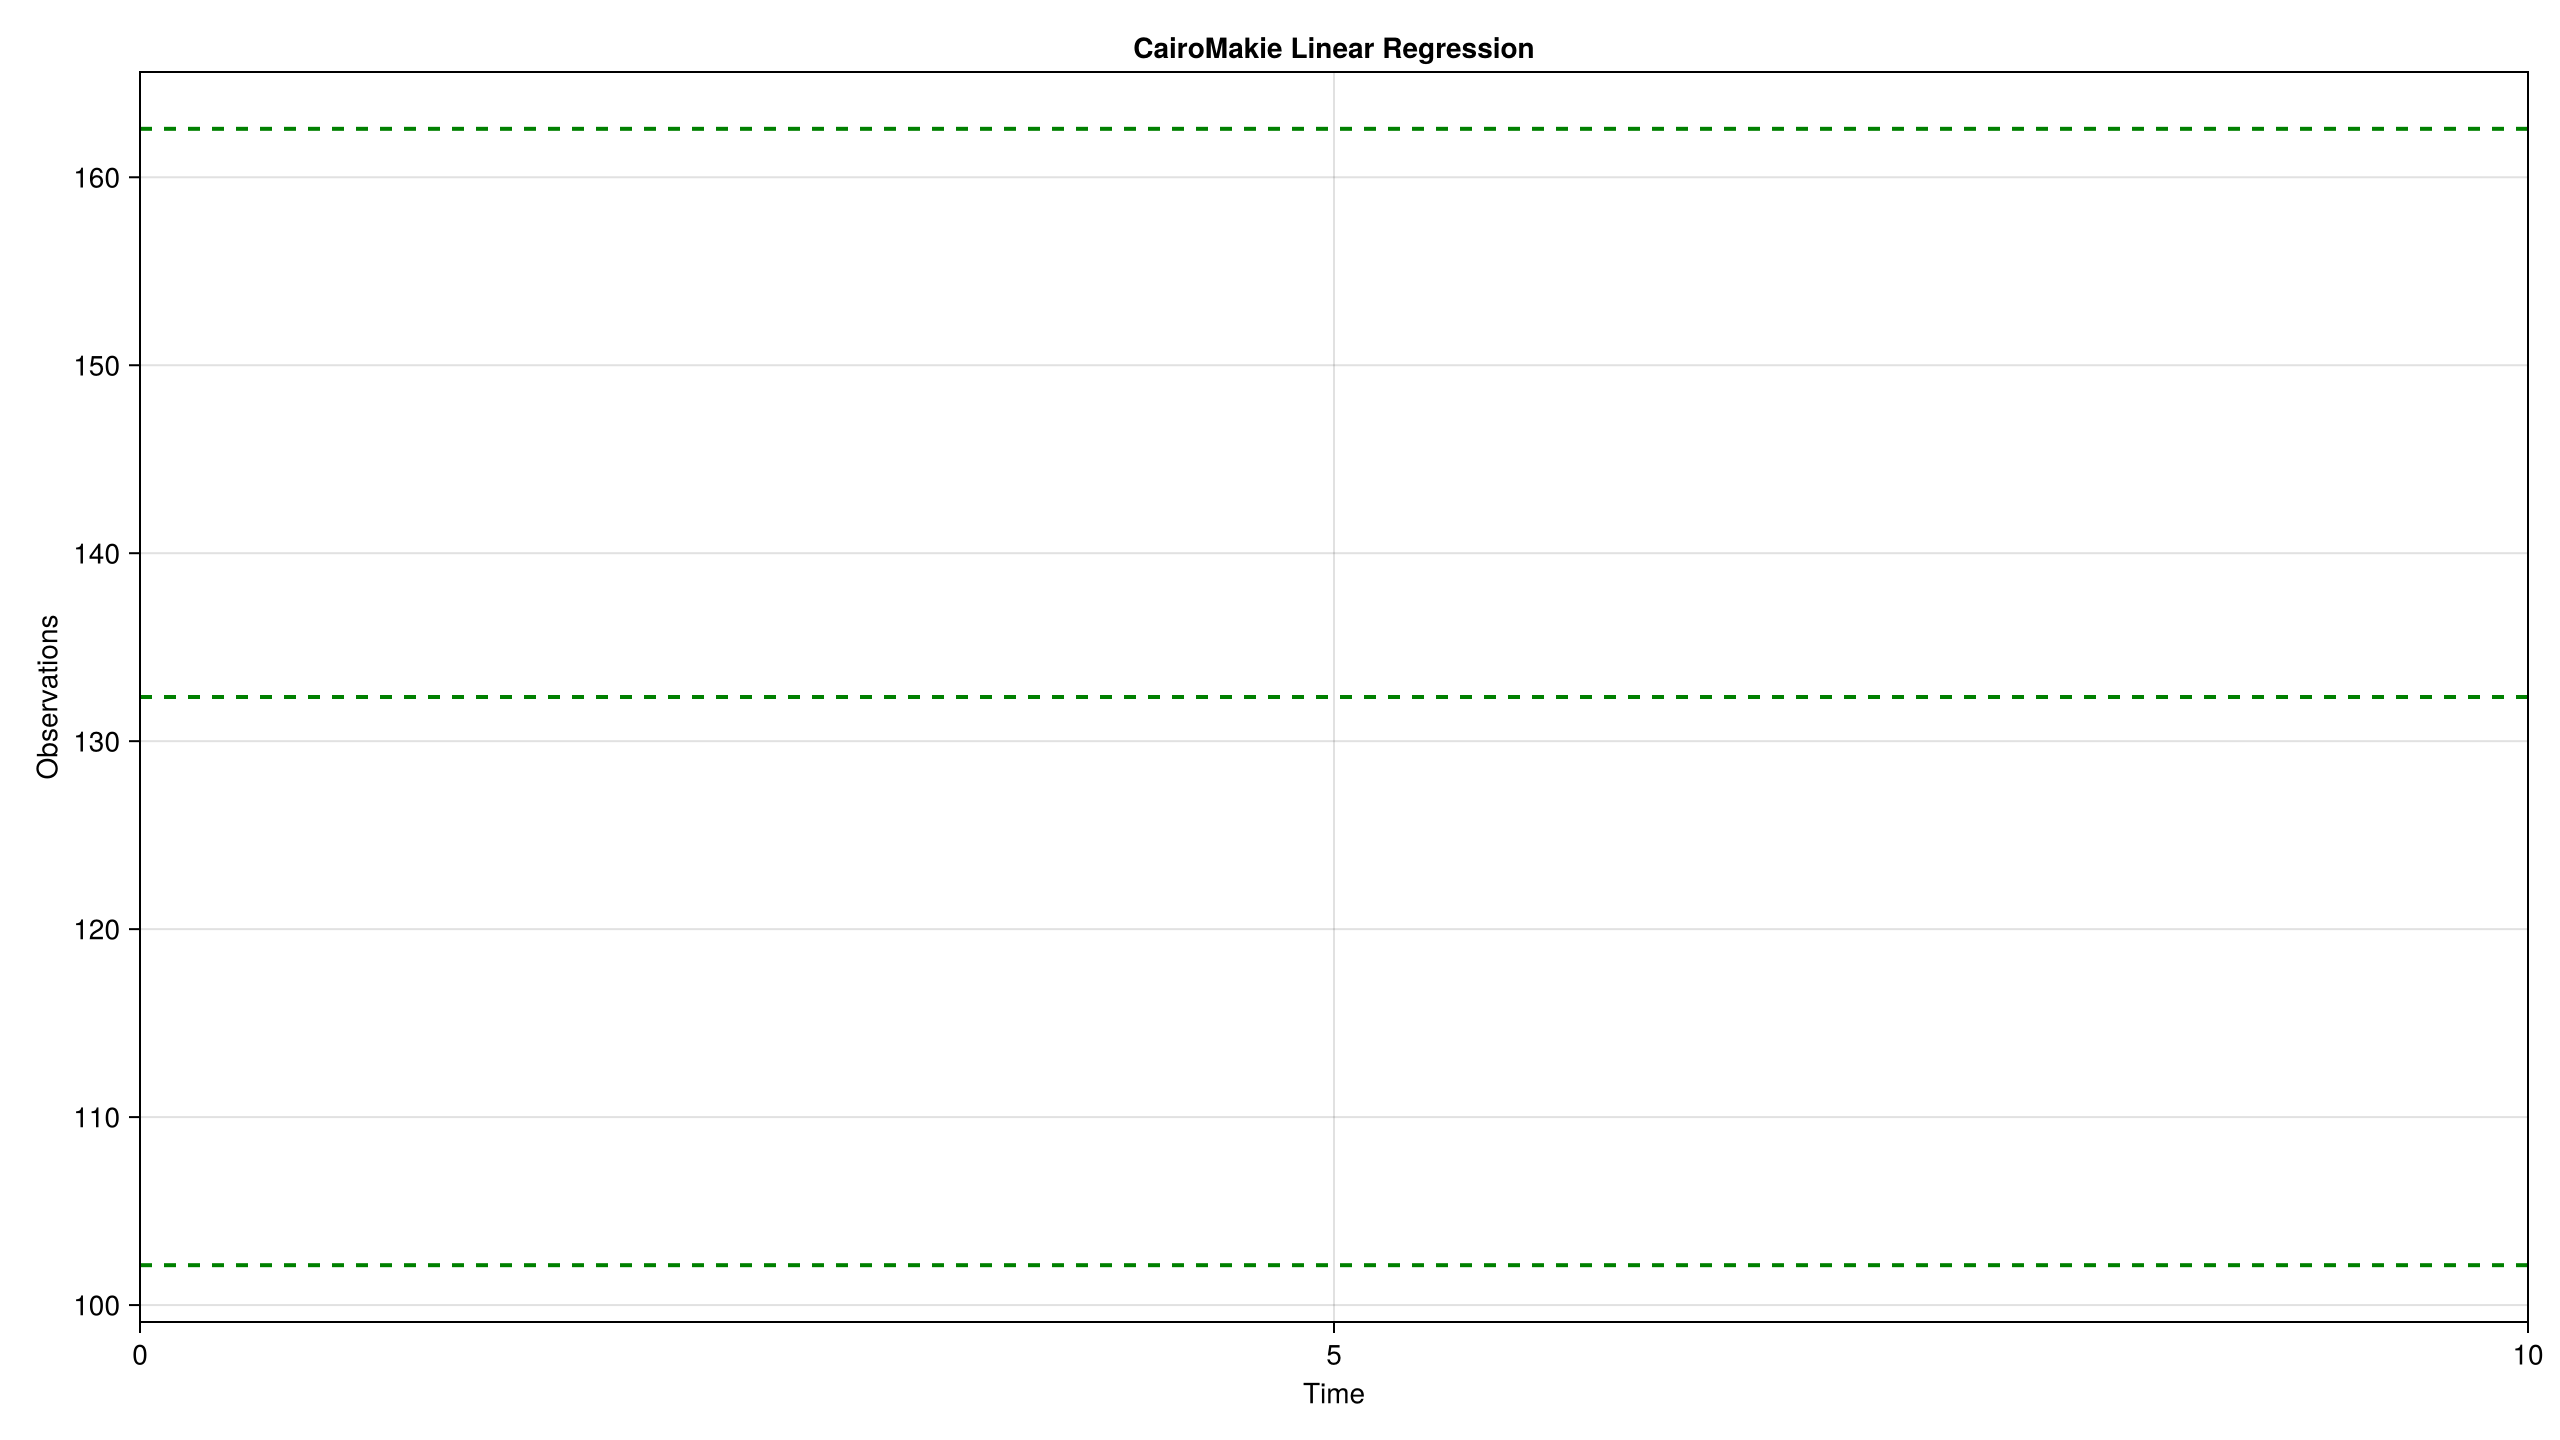

In [130]:

# add mean and standard deviations


avg = mean(observations)
stdev = std(observations)

line1 = hlines!(ax1, [avg - stdev, avg, avg + stdev],
    color=:green, linewidth=2, linestyle=:dash
)
fig


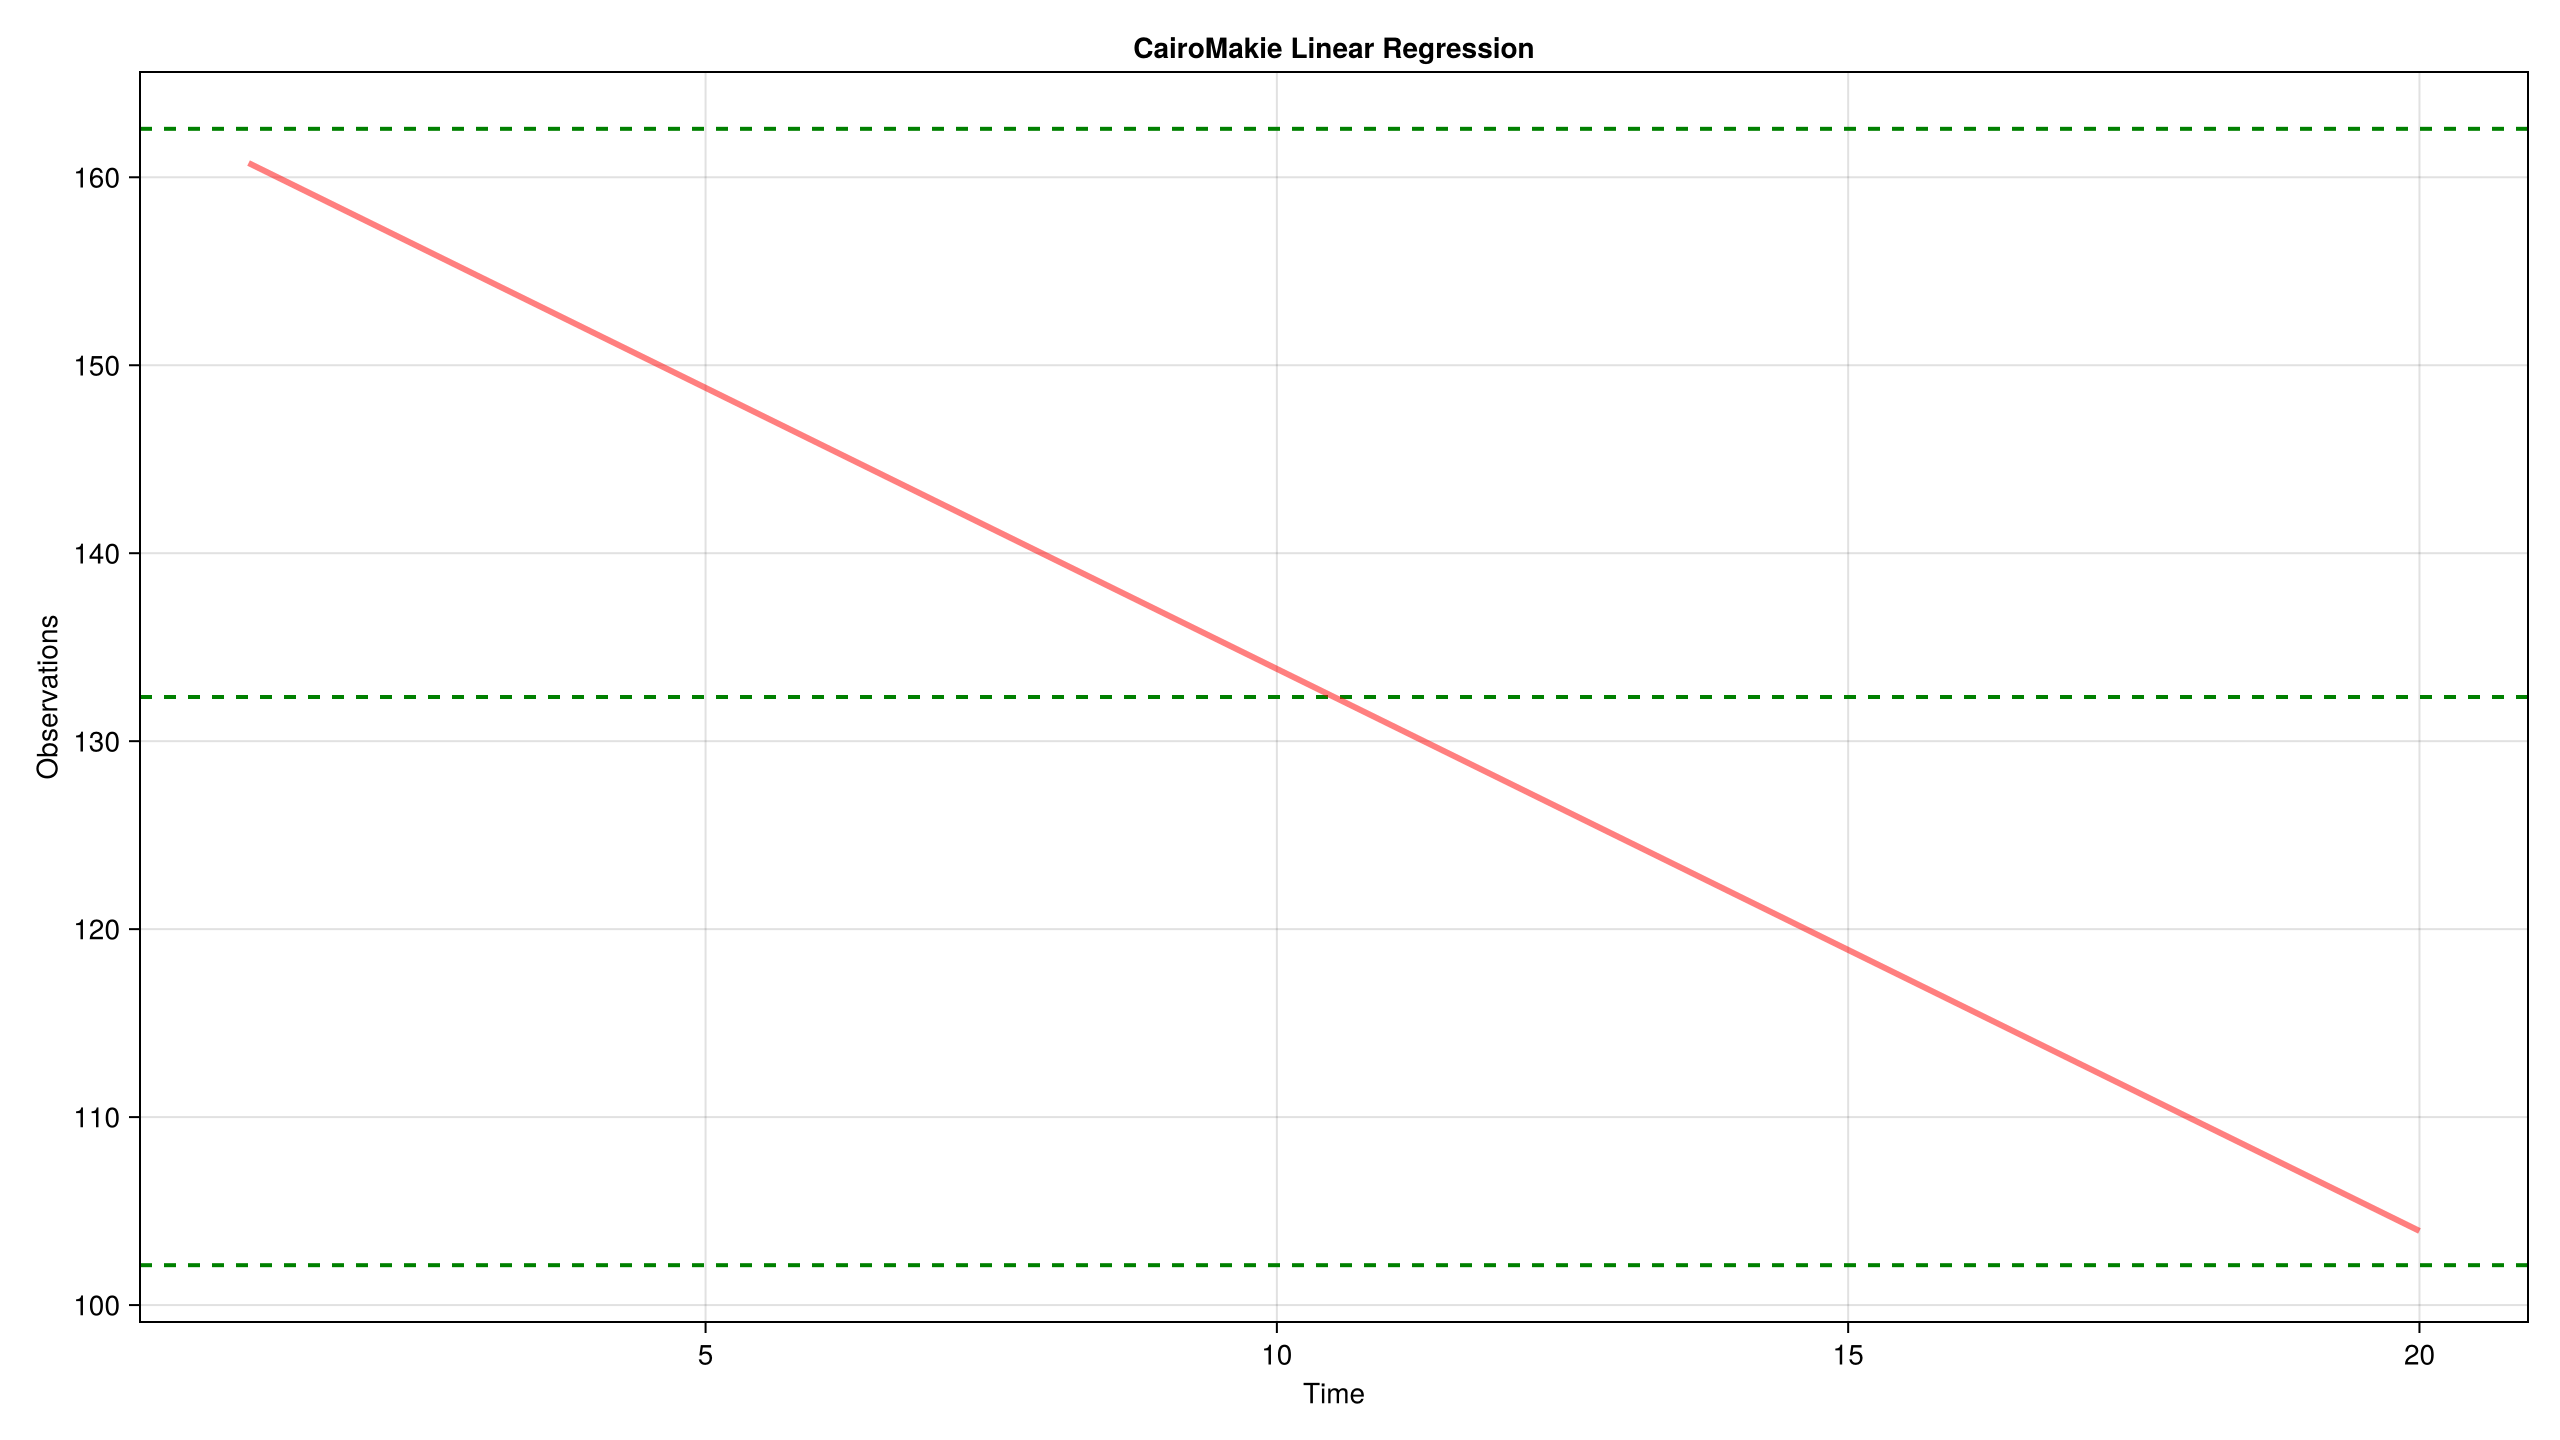

In [131]:

# add a linear regression line

using GLM
using TypedTables

data = Table(X=t, Y=observations) # TypedTables

ols = lm(@formula(Y ~ X), data) # GLM

line2 = lines!(ax1, t, predict(ols), color=(:red, 0.5), linewidth=3)
fig


In [132]:

# save plot

save("regression_cairomakie.svg", fig)


CairoMakie.Screen{SVG}


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie C:\Users\eorlo\.julia\packages\Makie\ND0gA\src\scenes.jl:220


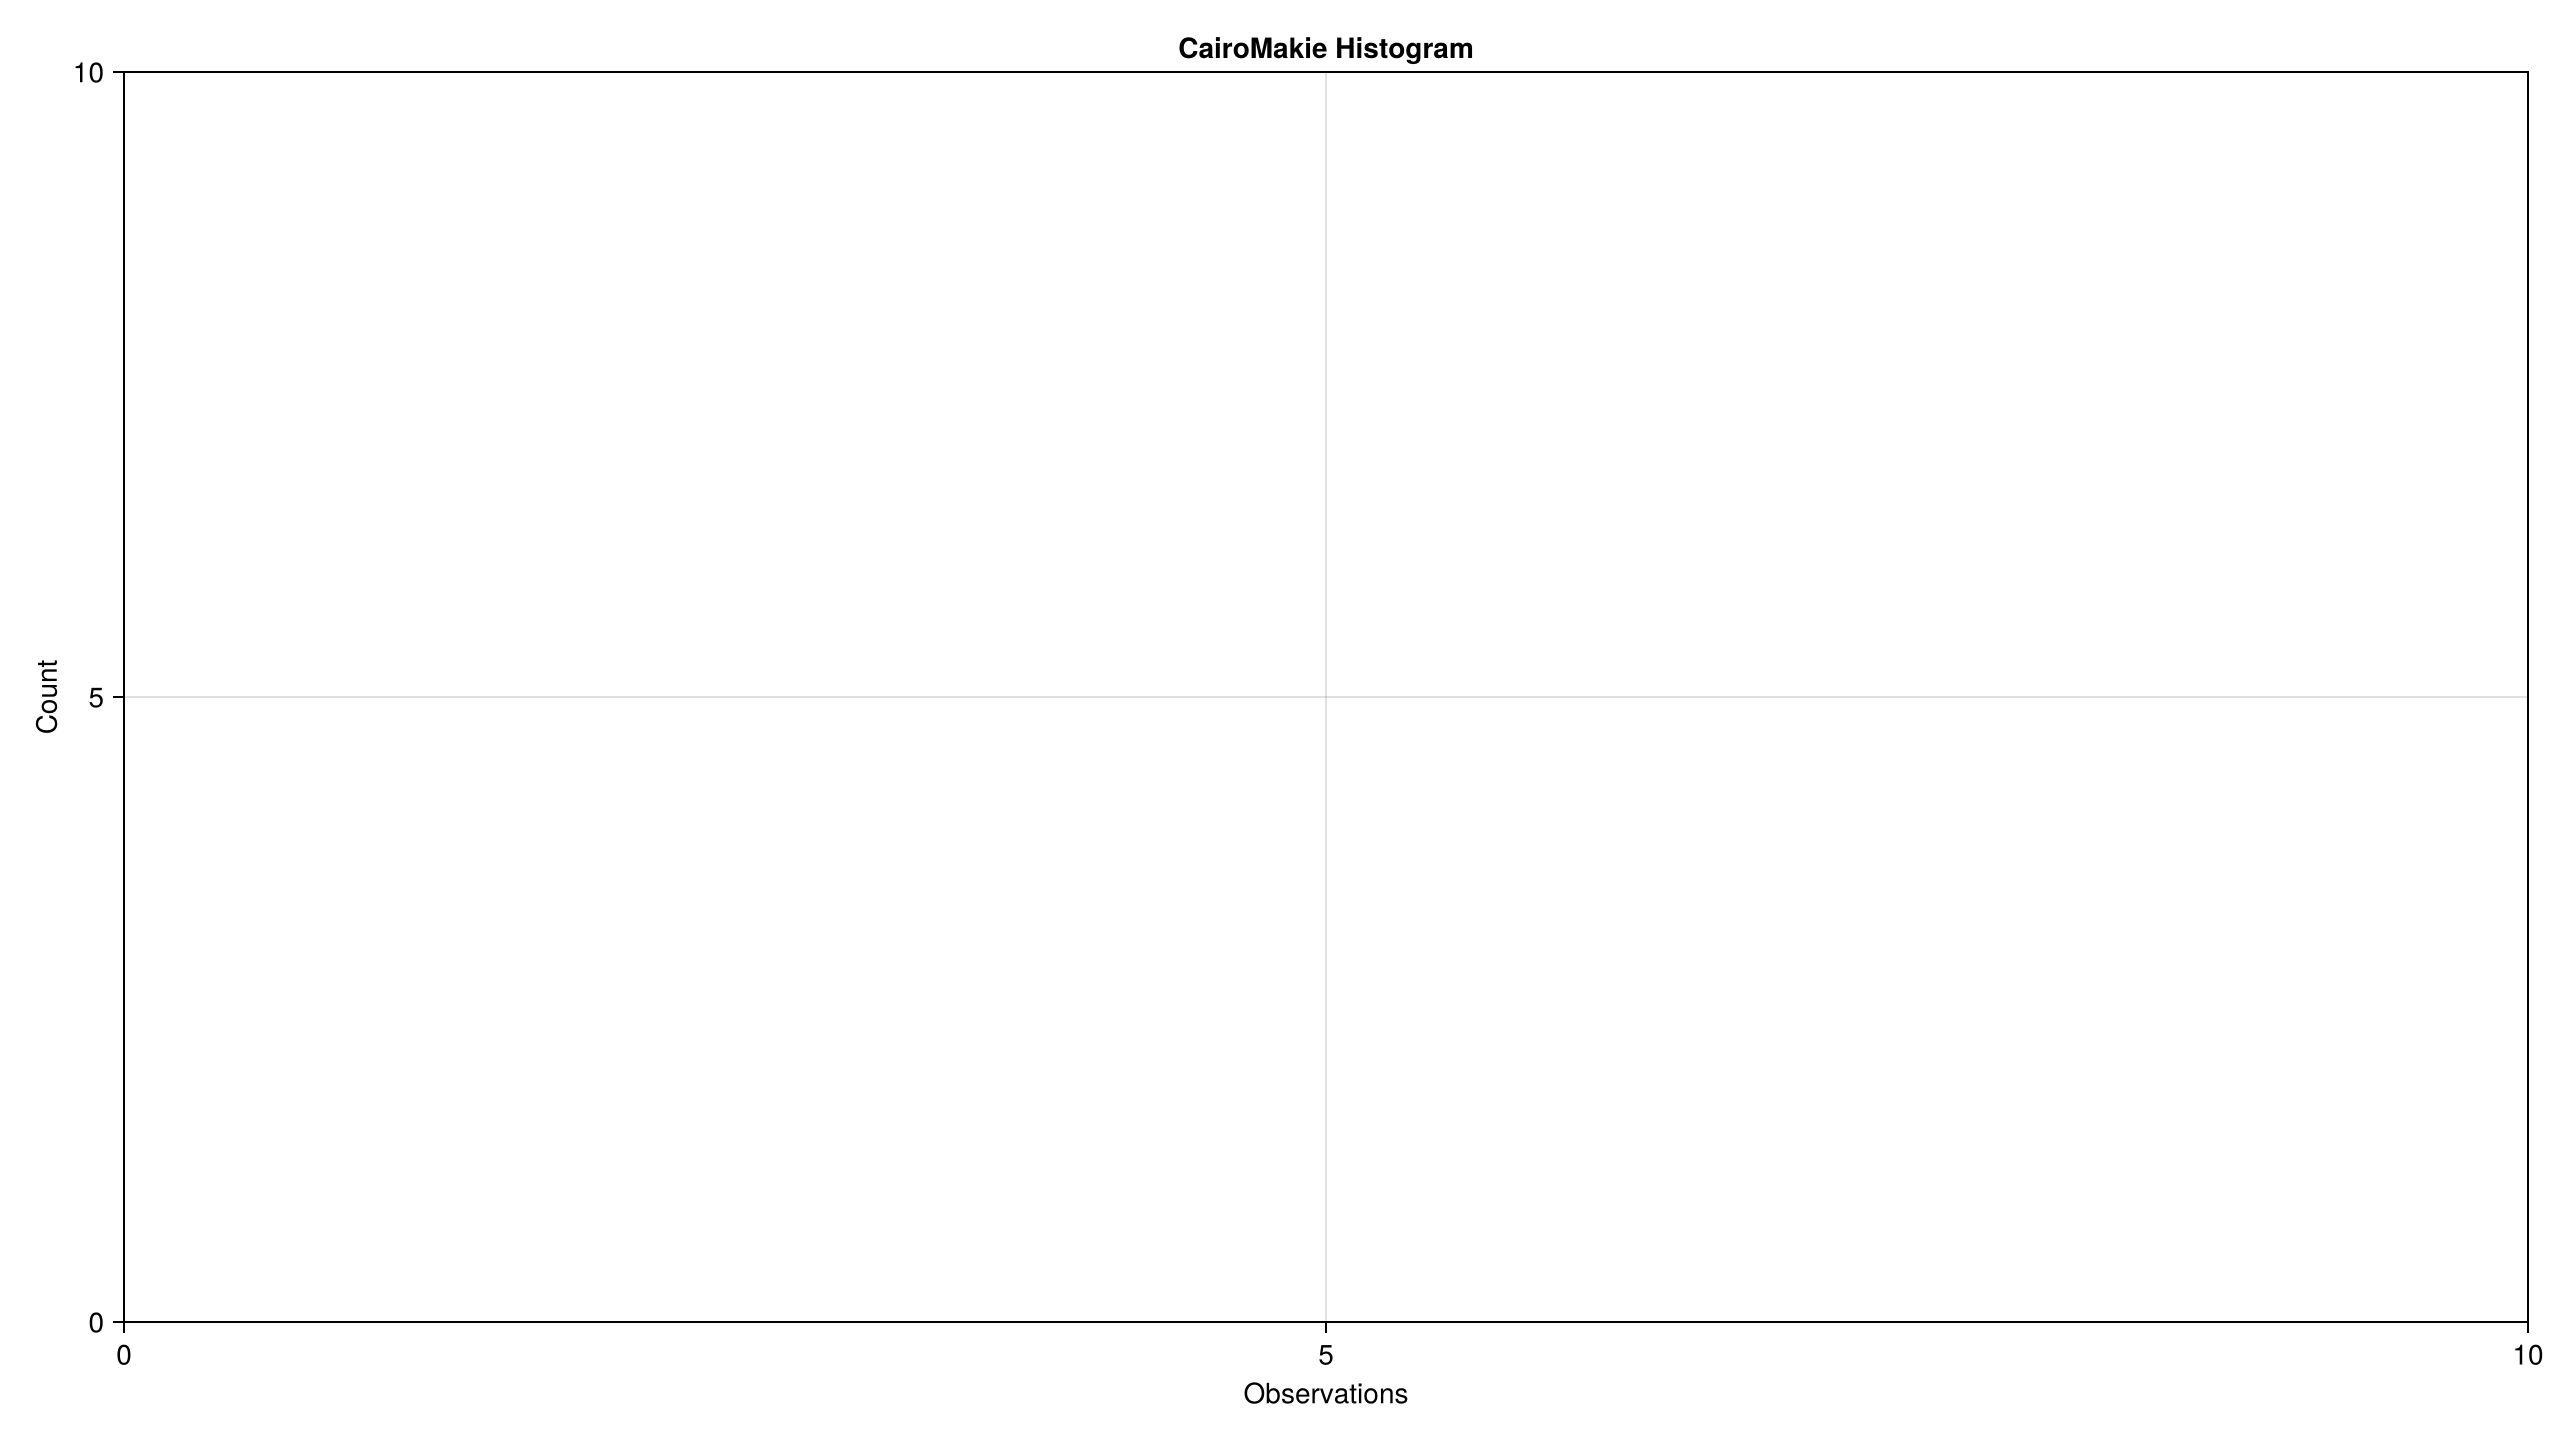

In [133]:

# 8. how to create histogram using CairoMakie

fig = Figure(resolution=(1280, 720), font=font5)

ax1 = fig[1, 1] = Axis(fig,
    title="CairoMakie Histogram",
    xlabel="Observations",
    ylabel="Count"
)
fig


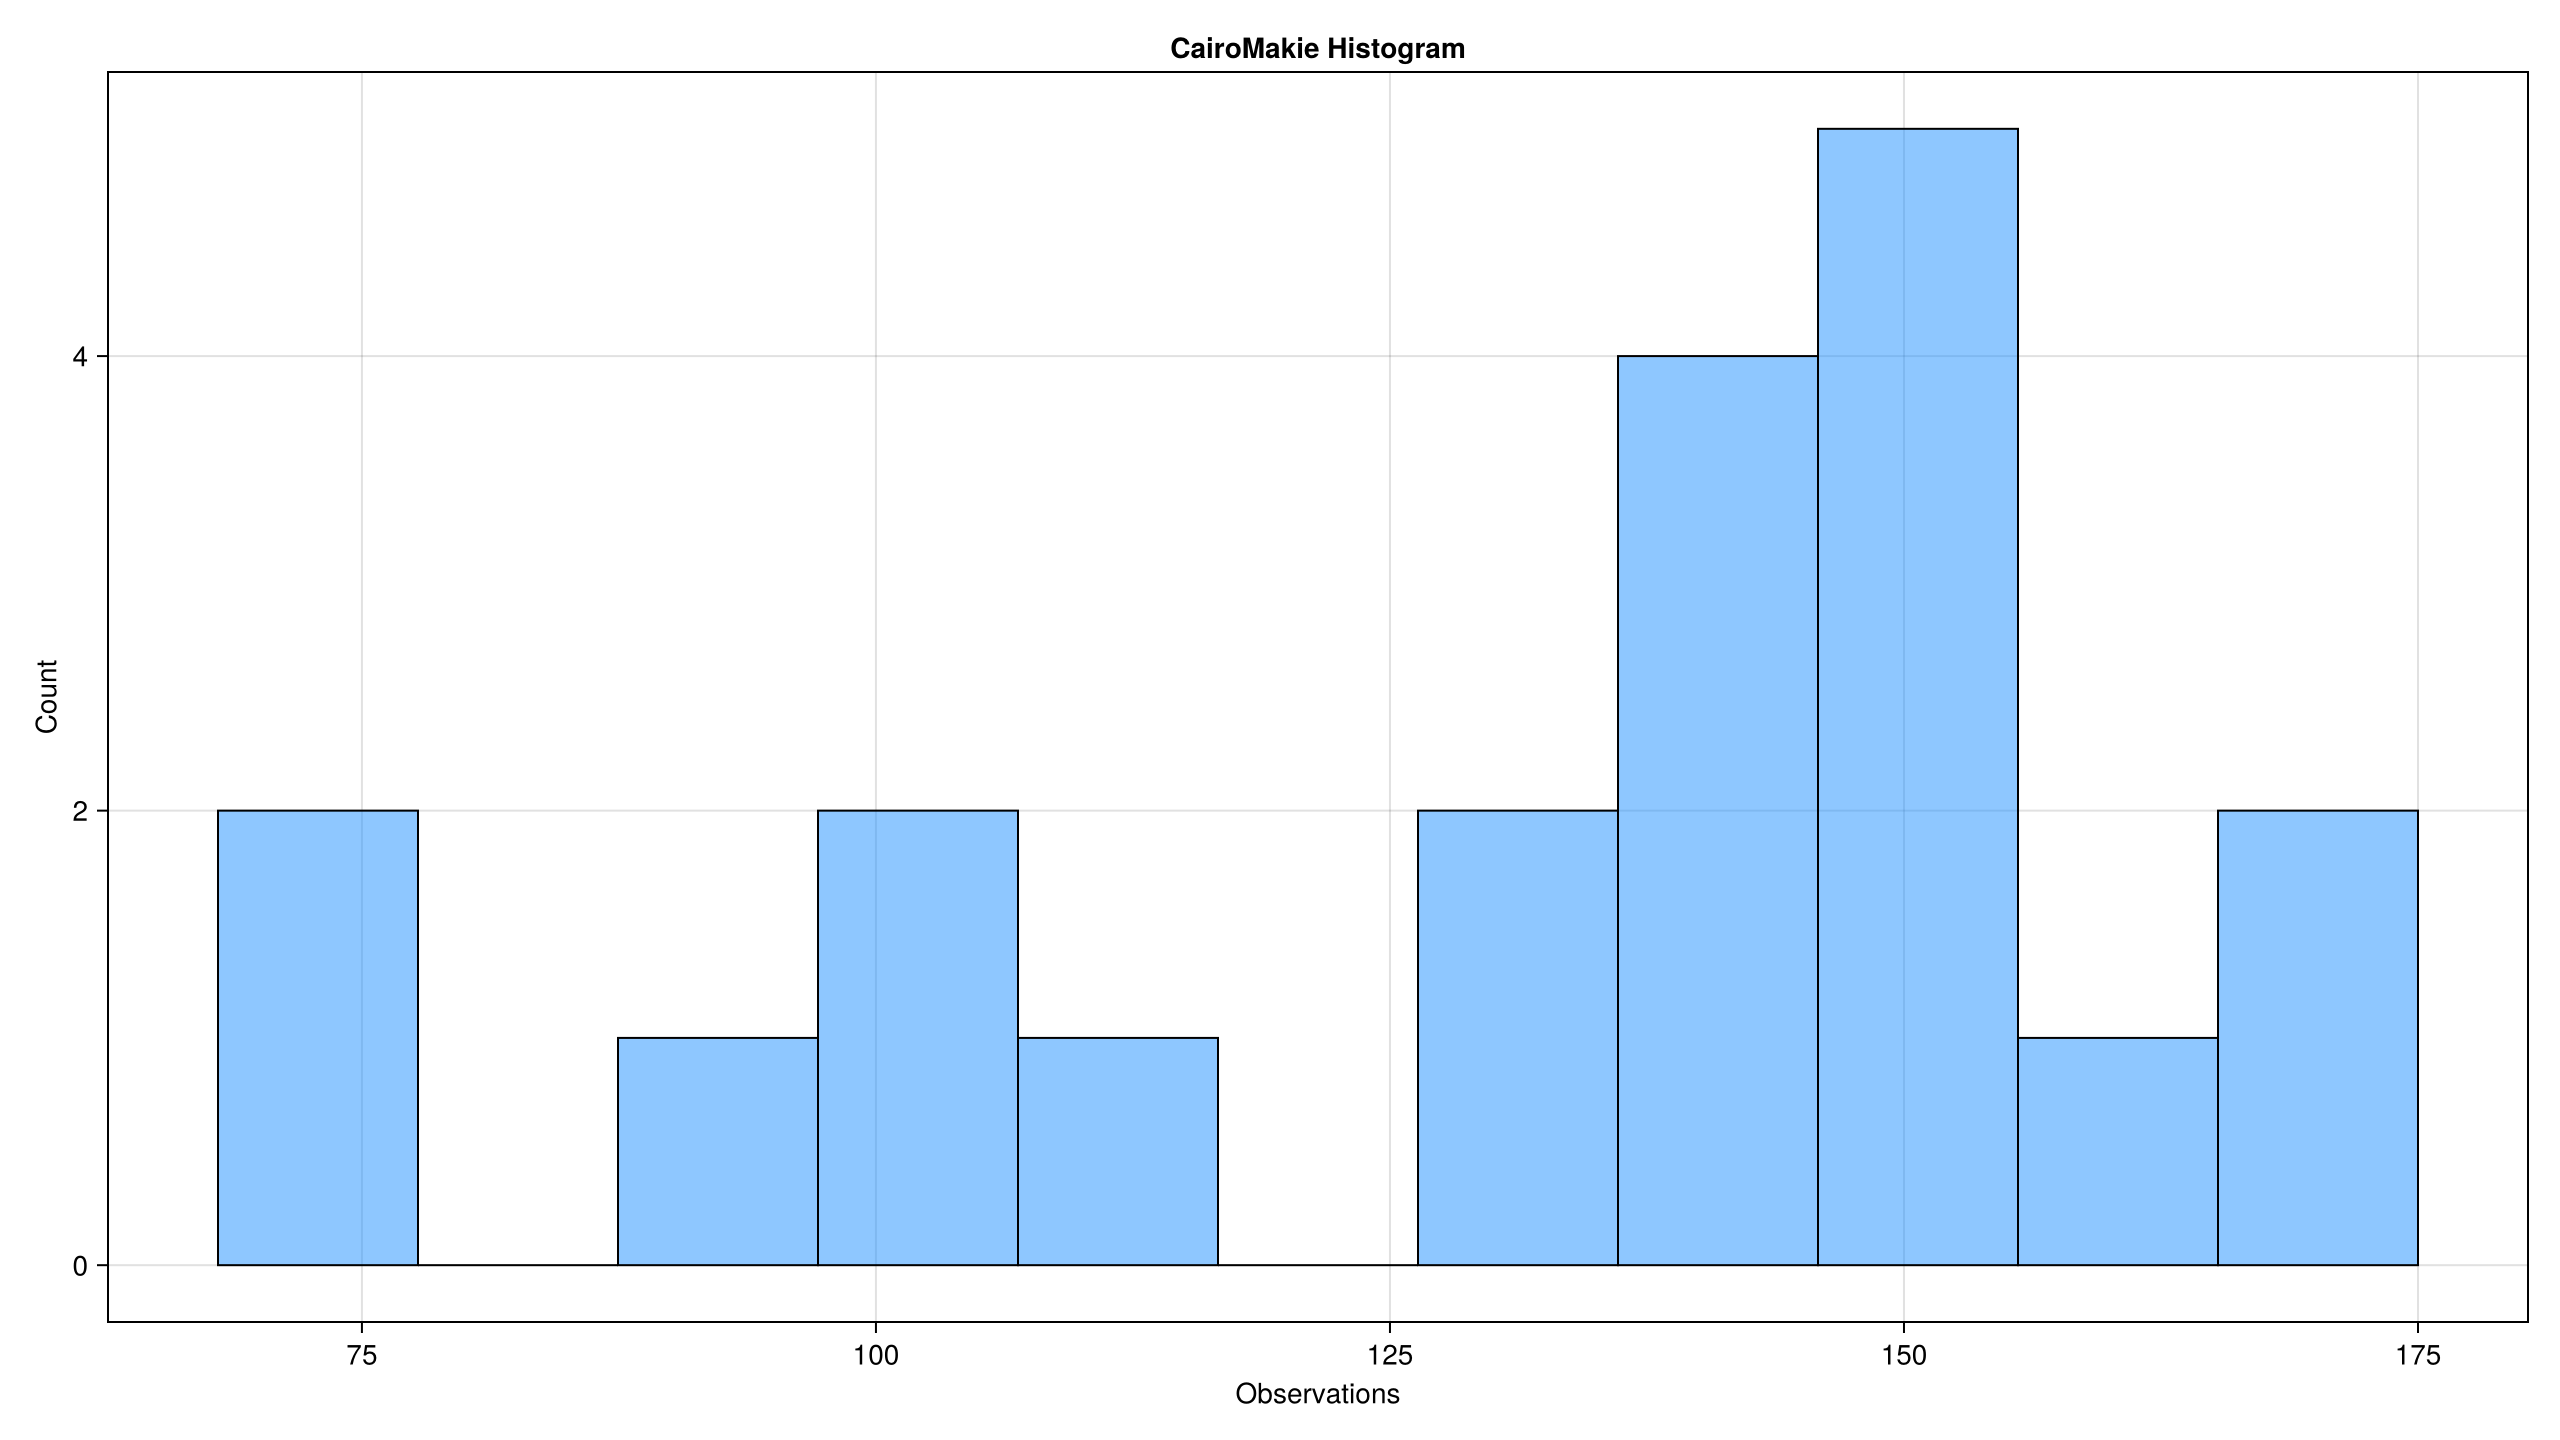

In [134]:

# Sturge's Rule

K = Int(round(1 + 3.322 * log(length(observations))))

# generate histogram of data

hist1 = hist!(ax1, observations,
    color=(:dodgerblue, 0.5),
    strokecolor=:black, strokewidth=1;
    bins=K
)
fig


In [135]:

# add mean and standard deviations

line1 = vlines!(ax1, [avg - stdev, avg, avg + stdev],
    color=:green, linewidth=2, linestyle=:dash
)
fig

# save plot

save("histogram_cairomakie.svg", fig)


CairoMakie.Screen{SVG}


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie C:\Users\eorlo\.julia\packages\Makie\ND0gA\src\scenes.jl:220


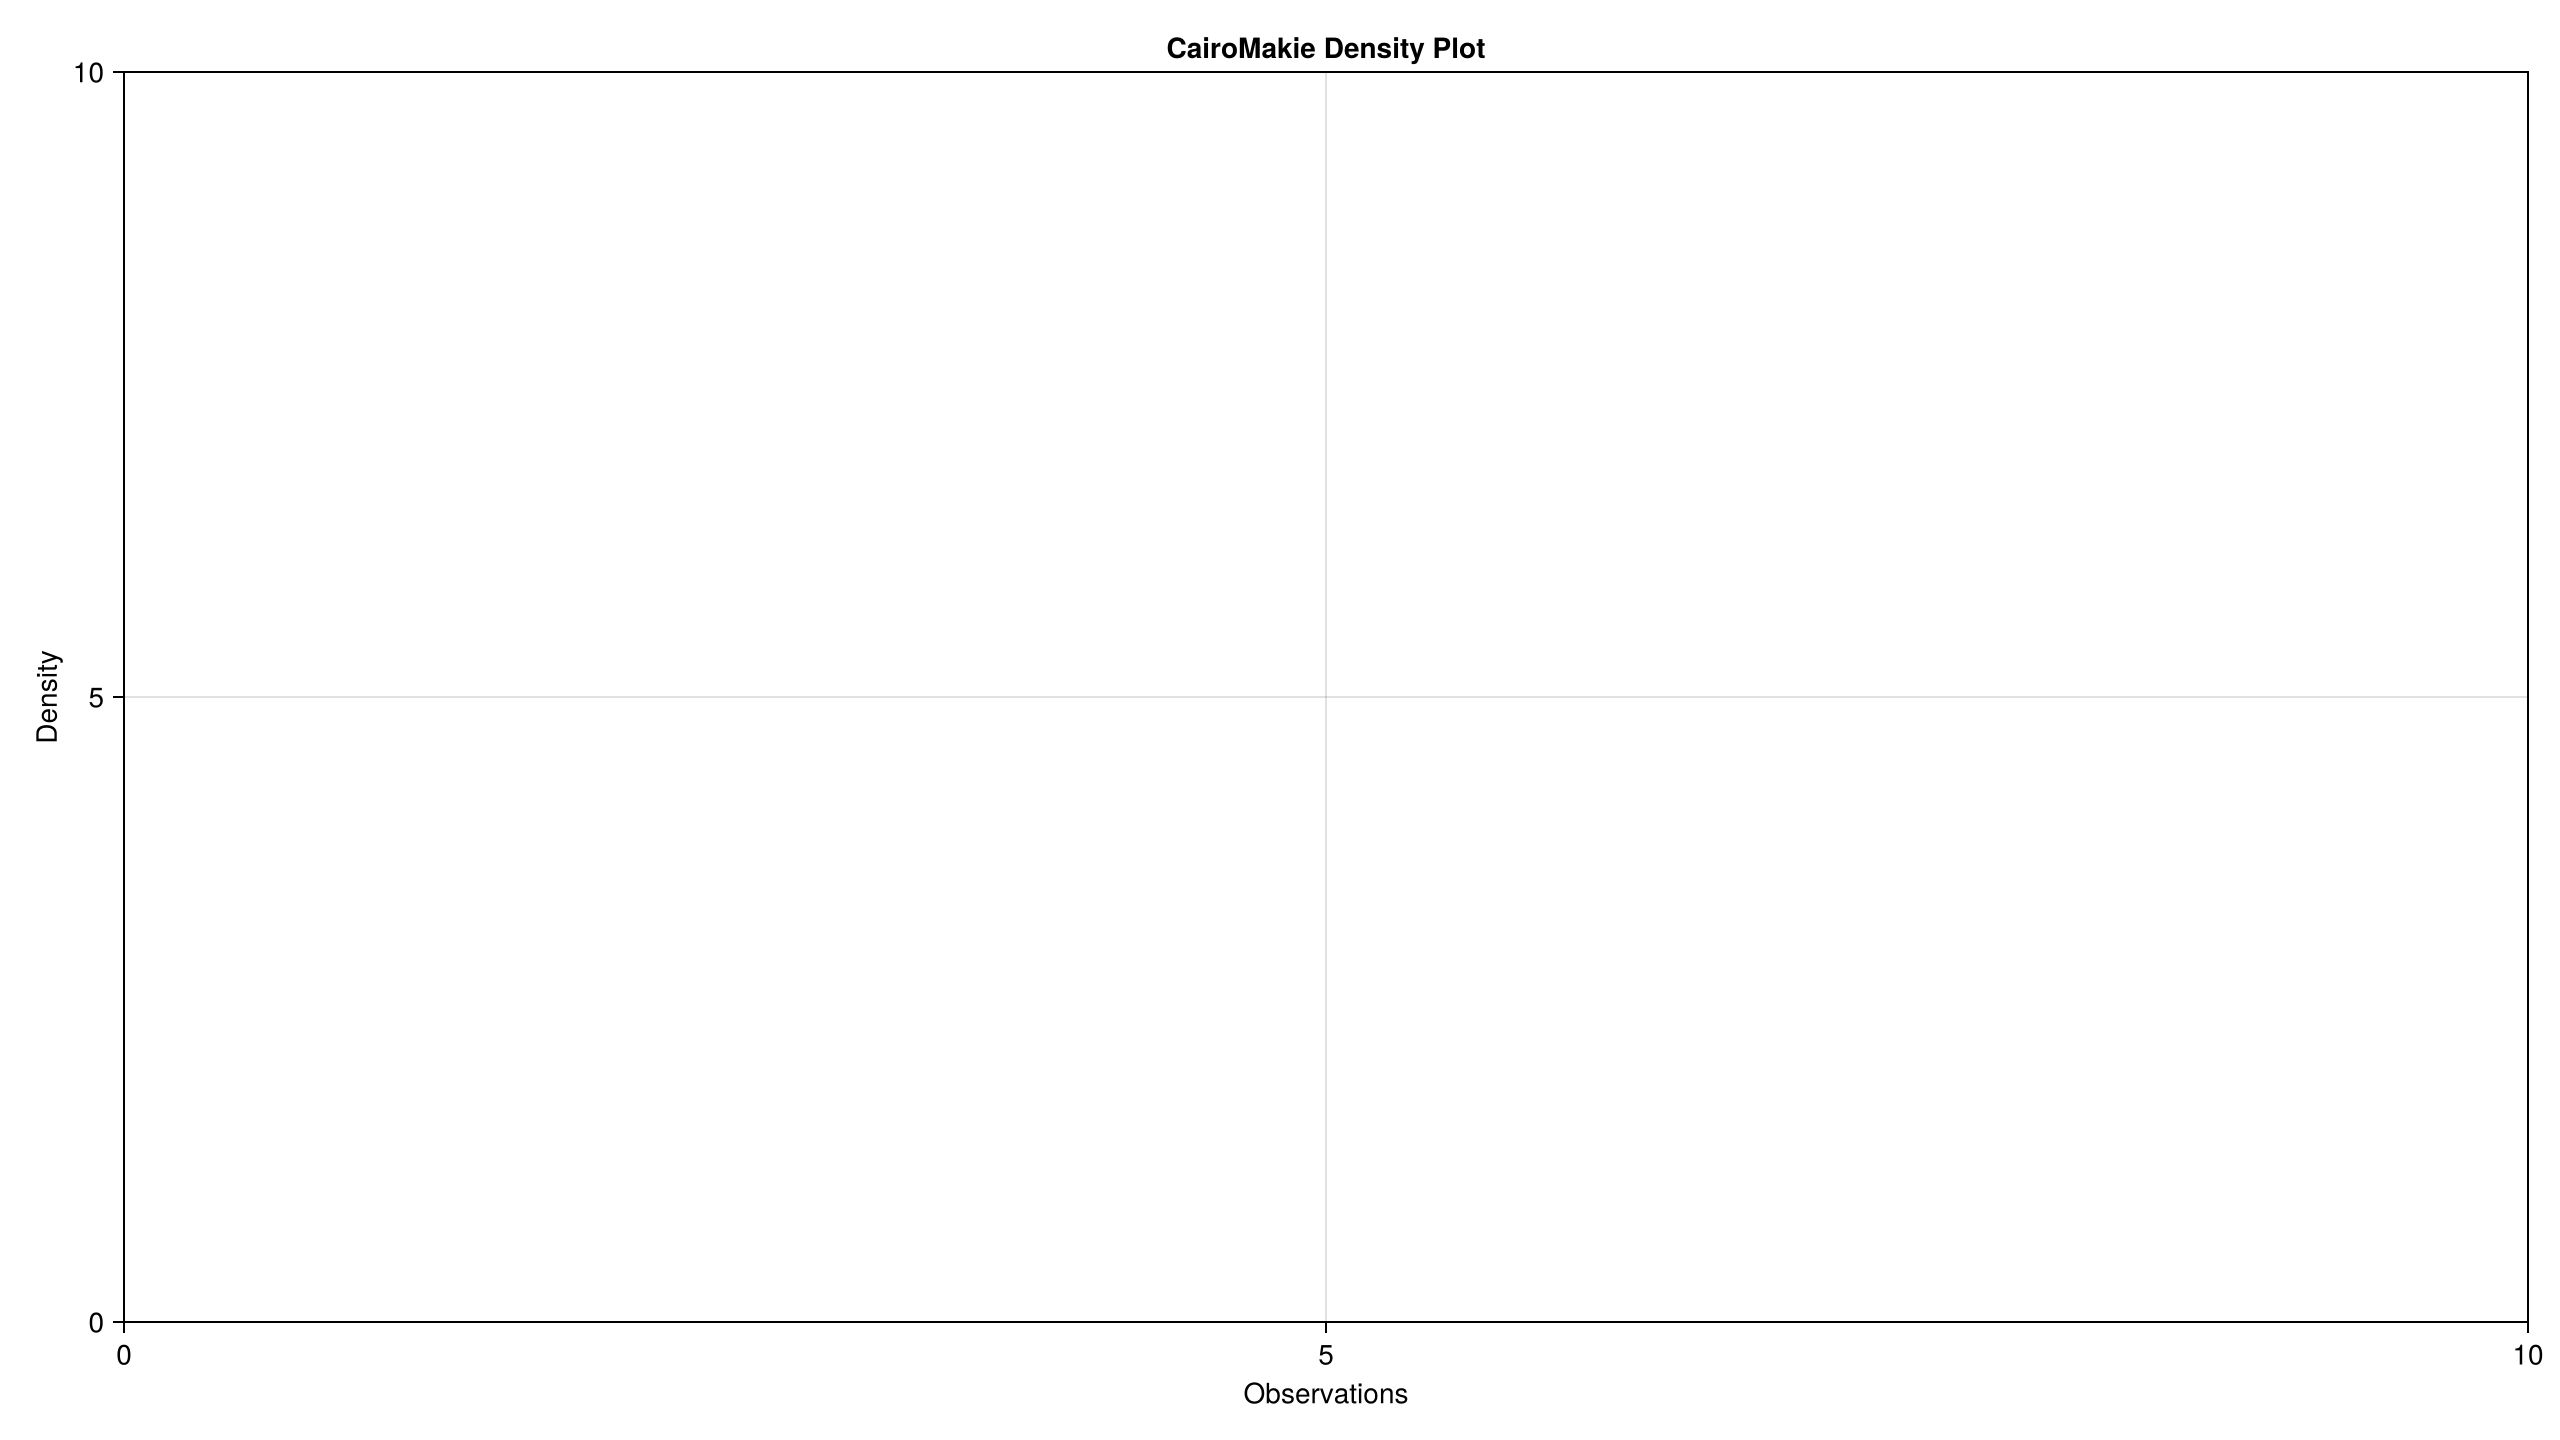

In [136]:

# 9. how to create density plot using CairoMakie

fig = Figure(resolution=(1280, 720), font=font5)

ax1 = fig[1, 1] = Axis(fig,
    title="CairoMakie Density Plot",
    xlabel="Observations",
    ylabel="Density"
)
fig


In [137]:
# generate plot

den1 = density!(ax1, observations,
    color=(:dodgerblue, 0.5),
    strokecolor=:black, strokewidth=1
)
fig


UndefVarError: UndefVarError: `density!` not defined

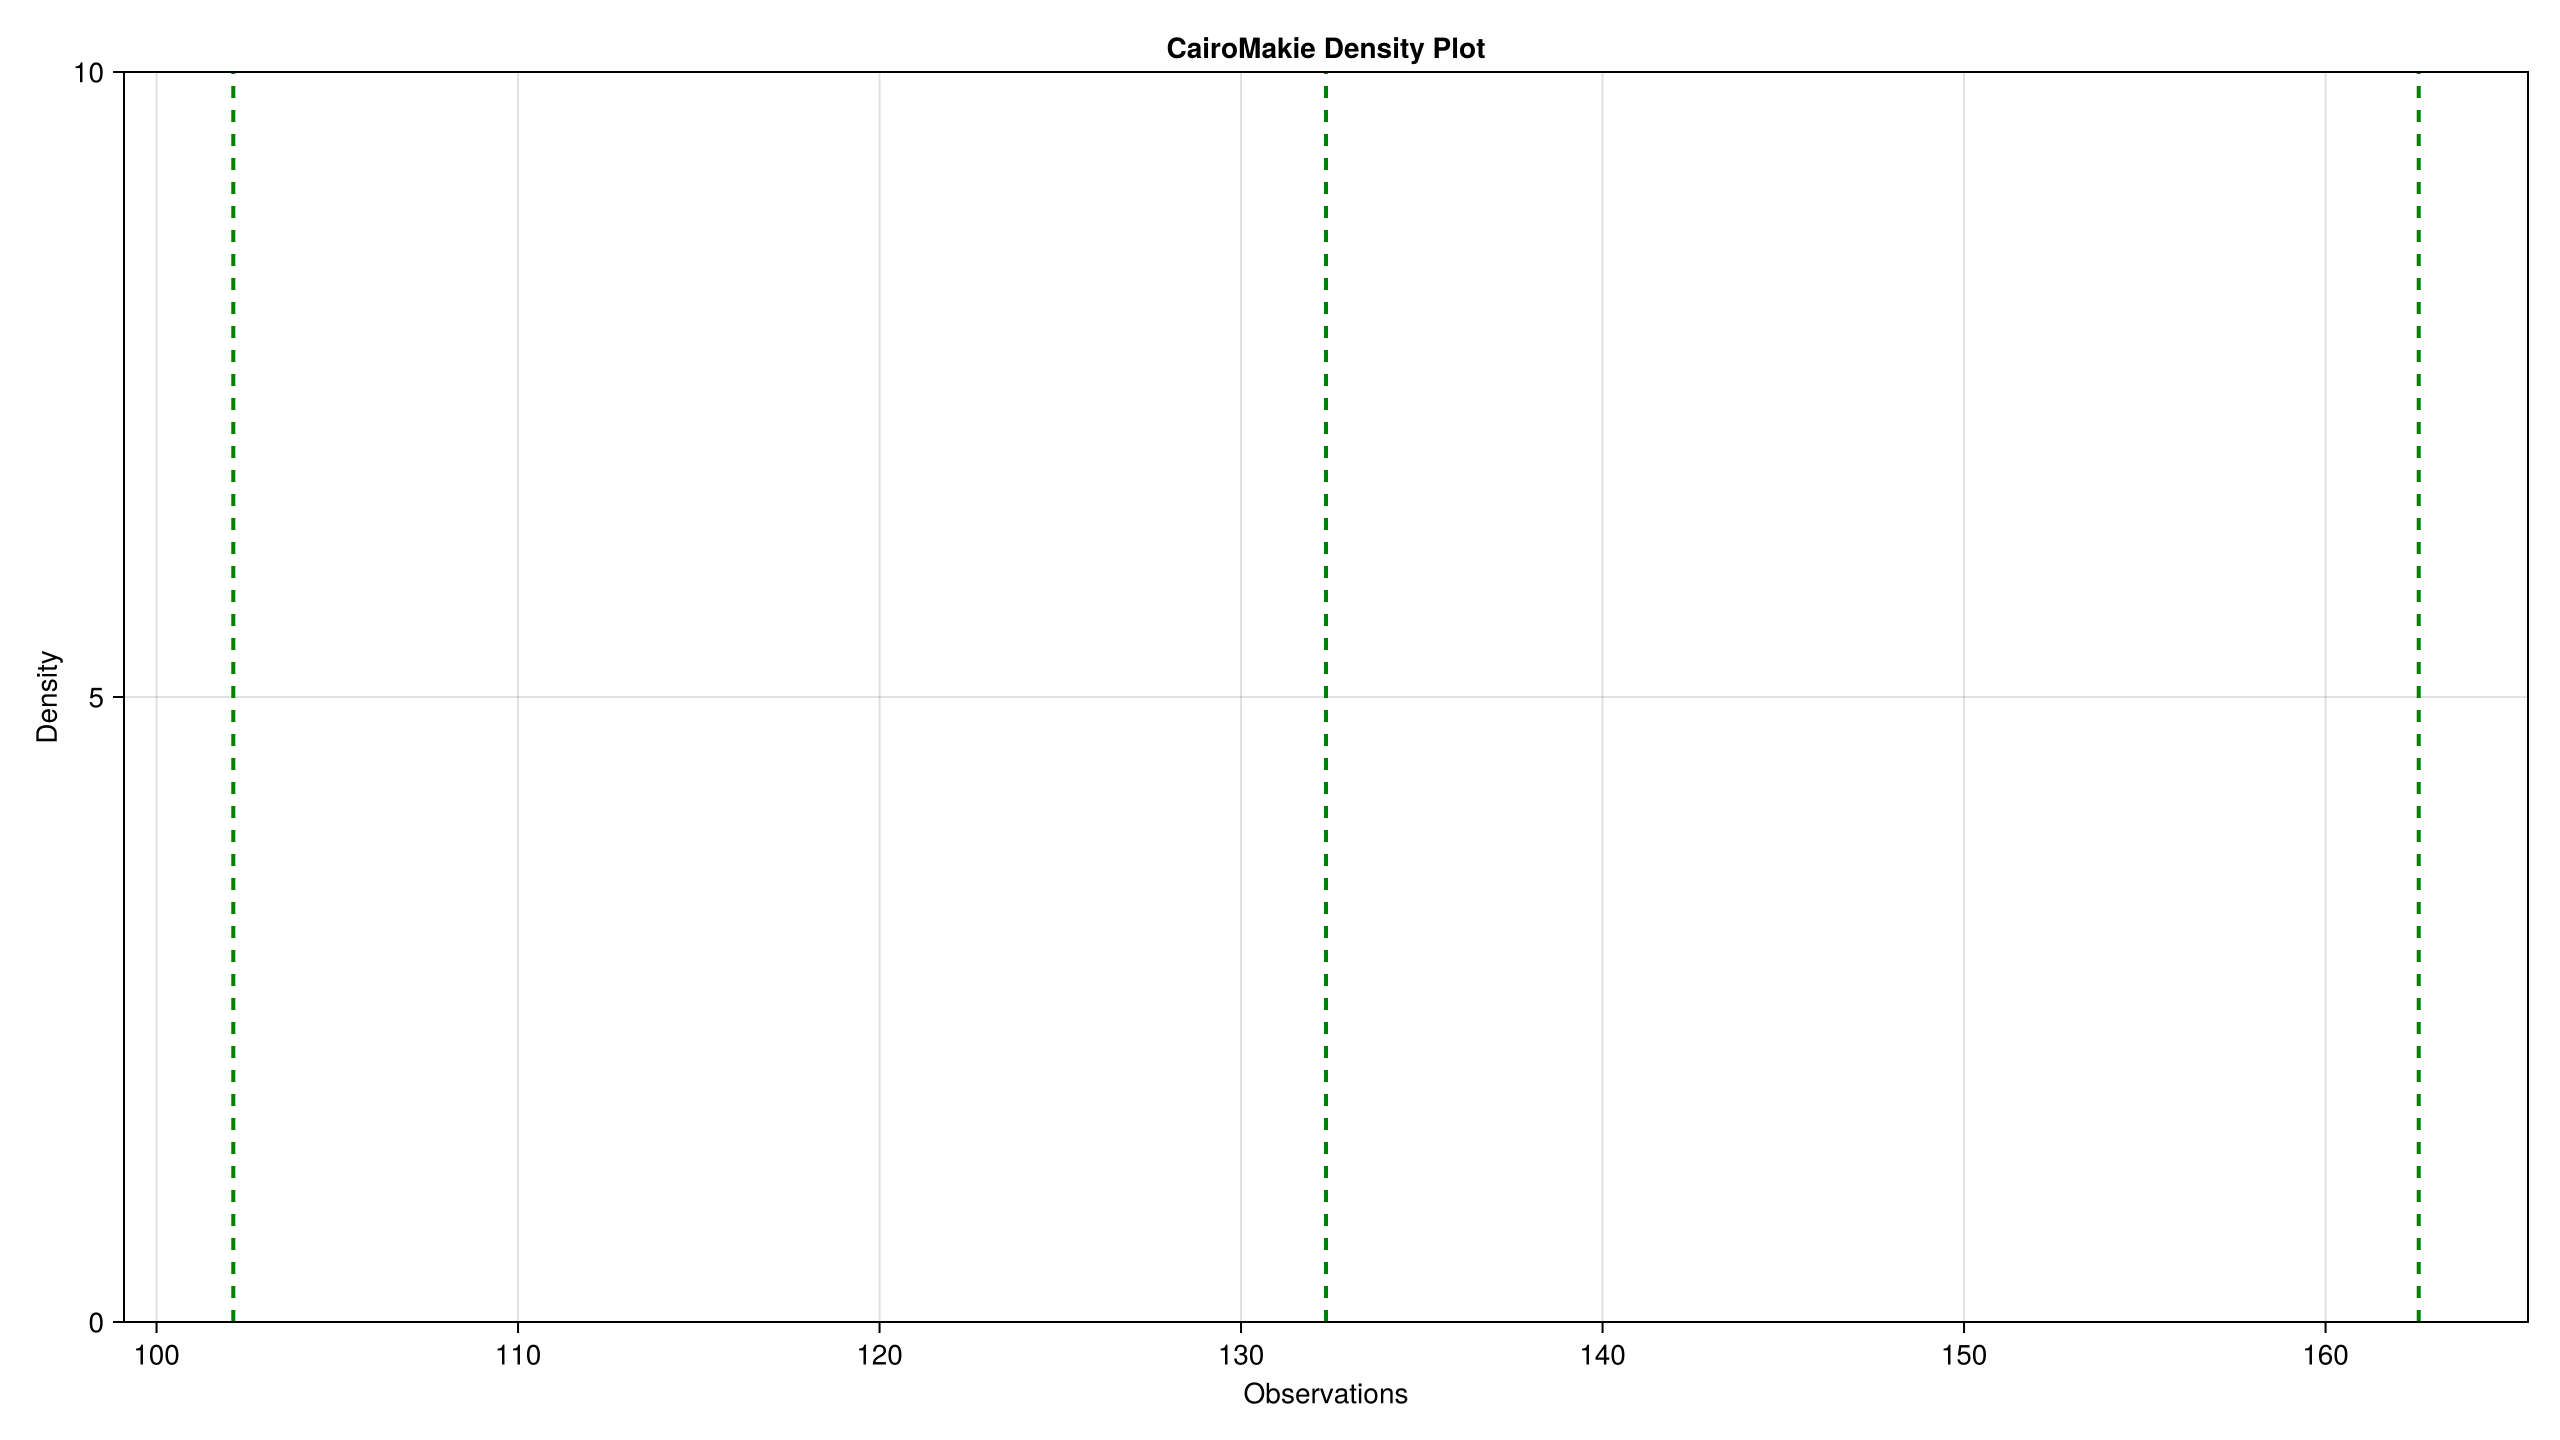

In [138]:
# add mean and standard deviations

line1 = vlines!(ax1, [avg - stdev, avg, avg + stdev],
    color=:green, linewidth=2, linestyle=:dash
)
fig

In [139]:
# save plot

save("density_cairomakie.svg", fig)

CairoMakie.Screen{SVG}
